# Telecom churn case study

#### Business Problem:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. <br>
For many operators, retaining high profitable customers is the number one business goal. <br>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


#### Business Objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

#### Customer cyle explanation:
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :
<br><br>
The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
<br><br>
The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
<br><br>
The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
<br><br>
In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [313]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings('ignore')

In [314]:
# Reading the data
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [315]:
# Getting the shape of our data
df.shape

(99999, 226)

In [316]:
# Creating a copy to preserve original data
churn_df = df.copy()

In [317]:
# creating a list of all column names
ls_columns = churn_df.columns.tolist()
#ls_columns

# High Value Customer

High-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [318]:
# using key word "rech" to find all recharge columns in the data
ls_recharge = [col for col in ls_columns if 'rech' in col]
ls_recharge

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [319]:
# total amount of recharge for talktime is available but has to be calculated for data data 
# total amount of data recharge is calaculated by average data recharge amount * total data recharge
churn_df['total_data_rech_amt_6'] = churn_df['av_rech_amt_data_6'] * churn_df['total_rech_data_6']
churn_df['total_data_rech_amt_7'] = churn_df['av_rech_amt_data_7'] * churn_df['total_rech_data_7']
churn_df['total_data_rech_amt_8'] = churn_df['av_rech_amt_data_8'] * churn_df['total_rech_data_8']
churn_df['total_data_rech_amt_9'] = churn_df['av_rech_amt_data_9'] * churn_df['total_rech_data_9']

# with our new column we can already drop those that were used to calculate it
churn_df.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

print(f'Our dataset now has only {churn_df.shape[1]} columns')

Our dataset now has only 222 columns


In [320]:
#finding the total recharge across month 6
month_6_total = churn_df['total_rech_amt_6'].fillna(0) + churn_df['total_data_rech_amt_6'].fillna(0)

#finding the total recharge across month 7
month_7_total = churn_df['total_rech_amt_7'].fillna(0) + churn_df['total_data_rech_amt_7'].fillna(0)

#finding the average recharge across the 6th and 7th month (good phase months)
avg_recharge = (month_6_total + month_7_total)/2

#required custoff for high value customers was 70th percentile
high_value_cutoff = np.percentile(avg_recharge, 70.0)
print(f'High value customer average cutoff recharge amount at 70th percentile is {high_value_cutoff}')


# As our business objective requires us to predict churn for only high value customers
# we drop those below our cutoff amount
churn_df = churn_df[avg_recharge >= high_value_cutoff]

print(f'Shape of high value customer dataset is now: {churn_df.shape}')

High value customer average cutoff recharge amount at 70th percentile is 478.0
Shape of high value customer dataset is now: (30001, 222)


In [321]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2

# Tagging Churn

Our brief expects us to conduct **usage-based churn** which is defined as customers who have not had any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. Since our dataset is over a period of four months as per phase definitions mentioned above the first two months (i.e. months 6 and 7) are considered as good phase. Month 8 is considered as the action phase and Month 9 as the churn phase.

The churned customers are marked as 1 based on the 9th month as per the following columns:

   - **total_ic_mou_9**  *(total incoming minutes of usage for month 9)*

   - **total_og_mou_9**  *(total outgoing minutes of usage for month 9)*

   - **vol_2g_mb_9**     *(volume of 2G mobile data usage for month 9)*

   - **vol_3g_mb_9**     *(volume of 3G mobile data usage for month 9)*

In [322]:
# Making a list of columns with 9 in them 
ls_month9 = [col for col in ls_columns if '9' in col]
#ls_month9

In [323]:
# lets introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn)
# we will calculate churn/non-churn based on the usage as mentioned above
churn_df['churn'] = np.where(churn_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014

In [324]:
# lets find out churn/non churn percentage
churn_df['churn'].value_counts()/len(churn_df)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

<br>

**91%** of the customers do not churn, this is a case of class imbalance and will be treated later

In [325]:
# Dropping all the columns belonging to month 9

churn_df.drop([ col for col in ls_month9 if col not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],
                axis=1, inplace=True)
churn_df.shape

(30001, 171)

# Data Cleaning

In [326]:
churn_df.head(15)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,36

<br></br>
Some columns like ***"circle id"*** appear to have just one value and won't help our analysis.
We shall now analyse the uniqueness of each column before we move futher into data cleaning to only work on those columns that provide us with value during our analysis.

<br>

In [327]:
# Checking for columns with unique value columns and drop them as they are give us no additional info or insight into the data
print('List of columns deleted:')
print()
for i in churn_df.columns:
    if churn_df[i].nunique() == 1:
        print(i)
        churn_df.drop(i,axis=1,inplace = True)

List of columns deleted:

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [328]:
churn_df.shape

(30001, 158)

Our data now has only 158 columns

In [329]:
churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,21

In [330]:
# The date columns don't add any value to our analysis and hence we will drop them too
date_col = [col for col in churn_df.columns if 'date' in col]
date_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [331]:
churn_df.drop(date_col, axis=1, inplace=True)
[col for col in churn_df.columns if 'date' in col]

[]

In [332]:
churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13

In [333]:
churn_df.shape

(30001, 152)

In [334]:
# Checking for missing values per column in our dataset
missing_values = round(churn_df.isna().sum() / len(churn_df) * 100, 2).sort_values(ascending=False)
missing_values

total_data_rech_amt_9    49.27
arpu_2g_8                46.83
fb_user_8                46.83
max_rech_data_8          46.83
count_rech_3g_8          46.83
night_pck_user_8         46.83
count_rech_2g_8          46.83
arpu_3g_8                46.83
total_data_rech_amt_8    46.83
arpu_3g_6                44.15
total_data_rech_amt_6    44.15
fb_user_6                44.15
max_rech_data_6          44.15
arpu_2g_6                44.15
count_rech_3g_6          44.15
count_rech_2g_6          44.15
night_pck_user_6         44.15
total_data_rech_amt_7    43.15
count_rech_2g_7          43.15
max_rech_data_7          43.15
arpu_2g_7                43.15
fb_user_7                43.15
count_rech_3g_7          43.15
night_pck_user_7         43.15
arpu_3g_7                43.15
spl_og_mou_8              3.91
std_ic_mou_8              3.91
std_og_mou_8              3.91
std_ic_t2f_mou_8          3.91
isd_og_mou_8              3.91
std_ic_t2m_mou_8          3.91
og_others_8               3.91
std_ic_t

A lot of the columns have more than 40% missing values which doesn't help us in our analysis. 

In [335]:
# Drop columns having more than 40% missing values
churn_df.drop(missing_values[missing_values > 40].index.tolist(), axis=1, inplace=True)
churn_df.shape

(30001, 127)

In [336]:
# Checking for missing values again
round(churn_df.isna().sum() / len(churn_df) * 100, 2).sort_values(ascending=False)

loc_ic_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
loc_og_t2c_mou_8      3.91
loc_og_mou_8          3.91
std_og_t2t_mou_8      3.91
std_og_t2m_mou_8      3.91
std_og_t2f_mou_8      3.91
std_og_mou_8          3.91
isd_og_mou_8          3.91
spl_og_mou_8          3.91
loc_ic_t2m_mou_8      3.91
loc_og_t2m_mou_8      3.91
loc_ic_mou_8          3.91
std_ic_t2t_mou_8      3.91
std_ic_t2m_mou_8      3.91
std_ic_t2f_mou_8      3.91
std_ic_mou_8          3.91
spl_ic_mou_8          3.91
isd_ic_mou_8          3.91
ic_others_8           3.91
loc_og_t2f_mou_8      3.91
og_others_8           3.91
offnet_mou_8          3.91
roam_og_mou_8         3.91
onnet_mou_8           3.91
roam_ic_mou_8         3.91
loc_og_t2t_mou_8      3.91
loc_og_t2f_mou_6      1.82
std_ic_t2f_mou_6      1.82
roam_og_mou_6         1.82
spl_og_mou_6          1.82
og_others_6           1.82
std_ic_t2m_mou_6      1.82
offnet_mou_6          1.82
loc_ic_mou_6          1.82
loc_ic_t2t_mou_6      1.82
loc_ic_t2m_mou_6      1.82
s

The rest of our columns columns have even less than 4% missing values and hence can be dropped as the count is negligible.

In [337]:
# Dropping rows with missing values
for col in churn_df.columns:
    churn_df = churn_df[~churn_df[col].isna()]
    
# Re-check missing values
round(churn_df.isna().sum() / len(churn_df) * 100, 2).sort_values(ascending=False)

mobile_number         0.0
total_ic_mou_7        0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
ic_others_8           0.0
ic_others_7           0.0
ic_others_6           0.0
isd_ic_mou_8          0.0
isd_ic_mou_7          0.0
isd_ic_mou_6          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
spl_ic_mou_6          0.0
total_ic_mou_8        0.0
total_ic_mou_6        0.0
total_rech_amt_7      0.0
std_ic_mou_8          0.0
std_ic_mou_7          0.0
std_ic_mou_6          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_8          0.0
total_rech_amt_6      0.0
total_rech_amt_8      0.0
loc_ic_mou_6          0.0
sachet_2g_6           0.0
sep_vbc_3g            0.0
jun_vbc_3g            0.0
jul_vbc_3g            0.0
aug_vbc_3g            0.0
aon         

Our dataset of high value customers is now rid of missing values.

In [338]:
print(churn_df.shape)
churn_df.head()

(28504, 127)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,

In [339]:
# Drop the column 'mobile_number' as it does not add any information 
churn_df.drop('mobile_number', axis=1, inplace=True)
churn_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.

In [340]:
churn_df.shape

(28504, 126)

Our dataset now has **28504** rows and **126** columns

We shall now try and analyse the correlation between all independent features in the dataset and see if any of them are highly correlated.If any of the features are found to be highly correlated we shall drop those columns.

In [341]:
corr = churn_df.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.717481
arpu_8              arpu_6              0.663516
                    arpu_7              0.769991
onnet_mou_7         onnet_mou_6         0.767866
onnet_mou_8         onnet_mou_6         0.643202
                    onnet_mou_7         0.808932
offnet_mou_7        offnet_mou_6        0.752692
offnet_mou_8        offnet_mou_6        0.604976
                    offnet_mou_7        0.772928
roam_ic_mou_8       roam_ic_mou_7       0.612381
roam_og_mou_6       roam_ic_mou_6       0.647909
roam_og_mou_8       roam_og_mou_7       0.603904
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.798237
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.707244
                    loc_og_t2t_mou_7    0.835341
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.790304
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.697494
                    loc_og_t2m_mou_7    0.827354
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.813785
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.675266
                    

In [342]:
# List of columns that are explained well by other columns
ls_high_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
churn_df.drop(ls_high_corr, axis=1, inplace=True)
churn_df.shape

(28504, 87)

In [343]:
churn_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


## Deriving new features

Since  the total are broken down into multiple smaller details  we will create new features that will each account for the good phase by averaging out the values for 6th and 7th month

In [344]:
# Seperating the 6th and 7th month columns
avg_6_7 = [col[:-2] for col in churn_df.columns if '6' in col or '7' in col]

# Creating new features and dropping redundant columns
for col in set(avg_6_7):
    churn_df[f'GP_avg_{col}'] = ( churn_df[f'{col}_6'] + churn_df[f'{col}_7'] ) / 2  #GP denotes the good phase and avg denotes that we've averaged it across 2 months
    churn_df.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
churn_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,GP_avg_onnet_mou,GP_avg_isd_ic_mou,GP_avg_std_og_mou,GP_avg_roam_ic_mou,GP_avg_std_og_t2f_mou,GP_avg_offnet_mou,GP_avg_loc_ic_mou,GP_avg_loc_og_t2c_mou,GP_avg_loc_og_mou,GP_avg_og_others,GP_avg_std_ic_t2t_mou,GP_avg_std_ic_t2f_mou,GP_avg_std_ic_mou,GP_avg_monthly_2g,GP_avg_max_rech_amt,GP_avg_ic_others,GP_avg_vol_2g_mb,GP_avg_sachet_3g,GP_avg_last_day_rch_amt,GP_avg_sachet_2g,GP_avg_monthly_3g,GP_avg_spl_ic_mou,GP_avg_spl_og_mou,GP_avg_arpu,GP_avg_roam_og_mou,GP_avg_isd_og_mou,GP_avg_total_rech_num
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,56.26,8.295,68.000,24.86,13.37,510.295,391.555,0.0,478.035,0.0,24.360,43.215,176.810,0.0,1185.0,15.465,0.000,0.0,0.0,0.0,0.0,0.105,2.25,1209.5150,18.165,0.090,5.0
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,910.65,122.16,0.0,0,382.36,0.000,136.870,0.00,0.00,87.645,52.630,0.0,333.135,0.0,0.290,0.000,13.545,0.5,122.0,0.000,178.000,0.0,25.0,0.5,0.0,0.000,0.00,435.4720,0.000,0.000,20.0
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0.00,0.00,0.0,0,117.26,0.000,848.990,0.00,0.00,827.305,106.505,0.0,95.565,0.0,10.020,0.000,62.985,0.0,50.0,0.000,0.000,0.0,25.0,0.0,0.0,0.000,0.00,556.1030,0.000,0.000,24.0
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,51.86,0.00,0.0,0,49.81,14.115,4.355,0.00,0.00,87.385,145.520,0.0,132.795,0.0,0.255,0.000,8.915,0.0,89.5,2.675,0.240,0.0,89.5,0.0,1.0,0.000,0.05,134.1235,0.000,0.005,4.0
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.000,0.000,0.00,0.00,0.000,2.180,0.0,0.000,0.0,1.455,0.595,4.420,0.0,753.5,0.940,72.405,2.0,126.0,0.0,4.5,0.000,0.00,1669.9265,0.000,0.000,10.5


The ***vbc*** columns will have to averaged out manually as it doesn't have the number of month as a suffix

In [345]:
# Creating a column for vbc_3G
churn_df['GP_avg_vbc_3g'] = ( churn_df['jul_vbc_3g'] + churn_df['jun_vbc_3g'] ) / 2

# Drop redundant column
churn_df.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

churn_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,churn,GP_avg_onnet_mou,GP_avg_isd_ic_mou,GP_avg_std_og_mou,GP_avg_roam_ic_mou,GP_avg_std_og_t2f_mou,GP_avg_offnet_mou,GP_avg_loc_ic_mou,GP_avg_loc_og_t2c_mou,GP_avg_loc_og_mou,GP_avg_og_others,GP_avg_std_ic_t2t_mou,GP_avg_std_ic_t2f_mou,GP_avg_std_ic_mou,GP_avg_monthly_2g,GP_avg_max_rech_amt,GP_avg_ic_others,GP_avg_vol_2g_mb,GP_avg_sachet_3g,GP_avg_last_day_rch_amt,GP_avg_sachet_2g,GP_avg_monthly_3g,GP_avg_spl_ic_mou,GP_avg_spl_og_mou,GP_avg_arpu,GP_avg_roam_og_mou,GP_avg_isd_og_mou,GP_avg_total_rech_num,GP_avg_vbc_3g
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,1,56.26,8.295,68.000,24.86,13.37,510.295,391.555,0.0,478.035,0.0,24.360,43.215,176.810,0.0,1185.0,15.465,0.000,0.0,0.0,0.0,0.0,0.105,2.25,1209.5150,18.165,0.090,5.0,19.060
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,0,382.36,0.000,136.870,0.00,0.00,87.645,52.630,0.0,333.135,0.0,0.290,0.000,13.545,0.5,122.0,0.000,178.000,0.0,25.0,0.5,0.0,0.000,0.00,435.4720,0.000,0.000,20.0,516.405
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0,117.26,0.000,848.990,0.00,0.00,827.305,106.505,0.0,95.565,0.0,10.020,0.000,62.985,0.0,50.0,0.000,0.000,0.0,25.0,0.0,0.0,0.000,0.00,556.1030,0.000,0.000,24.0,0.000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,0,49.81,14.115,4.355,0.00,0.00,87.385,145.520,0.0,132.795,0.0,0.255,0.000,8.915,0.0,89.5,2.675,0.240,0.0,89.5,0.0,1.0,0.000,0.05,134.1235,0.000,0.005,4.0,25.930
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,0,0.00,0.000,0.000,0.00,0.00,0.000,2.180,0.0,0.000,0.0,1.455,0.595,4.420,0.0,753.5,0.940,72.405,2.0,126.0,0.0,4.5,0.000,0.00,1669.9265,0.000,0.000,10.5,2210.750


In [346]:
# Minutes of usage seems to divided onnet and offnet. 
# Both of these columns will be combined in to one total_mou column for each month with the good phase columns already averaged out and hence will be just added

churn_df['GP_avg_total_mou'] = churn_df['GP_avg_offnet_mou'] + churn_df['GP_avg_onnet_mou']
churn_df['total_mou_8'] = churn_df['onnet_mou_8'] + churn_df['offnet_mou_8']

# Drop the redundant columns
churn_df.drop(['GP_avg_offnet_mou', 'GP_avg_onnet_mou', 'onnet_mou_8','offnet_mou_8'], axis=1, inplace=True)

churn_df.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,churn,GP_avg_isd_ic_mou,GP_avg_std_og_mou,GP_avg_roam_ic_mou,GP_avg_std_og_t2f_mou,GP_avg_loc_ic_mou,GP_avg_loc_og_t2c_mou,GP_avg_loc_og_mou,GP_avg_og_others,GP_avg_std_ic_t2t_mou,GP_avg_std_ic_t2f_mou,GP_avg_std_ic_mou,GP_avg_monthly_2g,GP_avg_max_rech_amt,GP_avg_ic_others,GP_avg_vol_2g_mb,GP_avg_sachet_3g,GP_avg_last_day_rch_amt,GP_avg_sachet_2g,GP_avg_monthly_3g,GP_avg_spl_ic_mou,GP_avg_spl_og_mou,GP_avg_arpu,GP_avg_roam_og_mou,GP_avg_isd_og_mou,GP_avg_total_rech_num,GP_avg_vbc_3g,GP_avg_total_mou,total_mou_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,1,8.295,68.000,24.86,13.37,391.555,0.0,478.035,0.0,24.360,43.215,176.810,0.0,1185.0,15.465,0.000,0.0,0.0,0.0,0.0,0.105,2.25,1209.5150,18.165,0.090,5.0,19.060,566.555,378.20
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,0,0.000,136.870,0.00,0.00,52.630,0.0,333.135,0.0,0.290,0.000,13.545,0.5,122.0,0.000,178.000,0.0,25.0,0.5,0.0,0.000,0.00,435.4720,0.000,0.000,20.0,516.405,470.005,171.56
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0,0.000,848.990,0.00,0.00,106.505,0.0,95.565,0.0,10.020,0.000,62.985,0.0,50.0,0.000,0.000,0.0,25.0,0.0,0.0,0.000,0.00,556.1030,0.000,0.000,24.0,0.000,944.565,1068.53
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,0,14.115,4.355,0.00,0.00,145.520,0.0,132.795,0.0,0.255,0.000,8.915,0.0,89.5,2.675,0.240,0.0,89.5,0.0,1.0,0.000,0.05,134.1235,0.000,0.005,4.0,25.930,137.195,239.47
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,0,0.000,0.000,0.00,0.00,2.180,0.0,0.000,0.0,1.455,0.595,4.420,0.0,753.5,0.940,72.405,2.0,126.0,0.0,4.5,0.000,0.00,1669.9265,0.000,0.000,10.5,2210.750,0.000,0.00


In [347]:
churn_df.shape

(28504, 56)

As observed above our row indexes are not in order and need to be reset. We shall go ahead and reset the same.

In [348]:
# Reset the index 
churn_df.reset_index(inplace=True, drop=True)
churn_df.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,churn,GP_avg_isd_ic_mou,GP_avg_std_og_mou,GP_avg_roam_ic_mou,GP_avg_std_og_t2f_mou,GP_avg_loc_ic_mou,GP_avg_loc_og_t2c_mou,GP_avg_loc_og_mou,GP_avg_og_others,GP_avg_std_ic_t2t_mou,GP_avg_std_ic_t2f_mou,GP_avg_std_ic_mou,GP_avg_monthly_2g,GP_avg_max_rech_amt,GP_avg_ic_others,GP_avg_vol_2g_mb,GP_avg_sachet_3g,GP_avg_last_day_rch_amt,GP_avg_sachet_2g,GP_avg_monthly_3g,GP_avg_spl_ic_mou,GP_avg_spl_og_mou,GP_avg_arpu,GP_avg_roam_og_mou,GP_avg_isd_og_mou,GP_avg_total_rech_num,GP_avg_vbc_3g,GP_avg_total_mou,total_mou_8
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,1,8.295,68.000,24.86,13.37,391.555,0.0,478.035,0.0,24.360,43.215,176.810,0.0,1185.0,15.465,0.000,0.0,0.0,0.0,0.0,0.105,2.25,1209.5150,18.165,0.090,5.0,19.060,566.555,378.20
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,0,0.000,136.870,0.00,0.00,52.630,0.0,333.135,0.0,0.290,0.000,13.545,0.5,122.0,0.000,178.000,0.0,25.0,0.5,0.0,0.000,0.00,435.4720,0.000,0.000,20.0,516.405,470.005,171.56
2,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0,0.000,848.990,0.00,0.00,106.505,0.0,95.565,0.0,10.020,0.000,62.985,0.0,50.0,0.000,0.000,0.0,25.0,0.0,0.0,0.000,0.00,556.1030,0.000,0.000,24.0,0.000,944.565,1068.53
3,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,0,14.115,4.355,0.00,0.00,145.520,0.0,132.795,0.0,0.255,0.000,8.915,0.0,89.5,2.675,0.240,0.0,89.5,0.0,1.0,0.000,0.05,134.1235,0.000,0.005,4.0,25.930,137.195,239.47
4,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,0,0.000,0.000,0.00,0.00,2.180,0.0,0.000,0.0,1.455,0.595,4.420,0.0,753.5,0.940,72.405,2.0,126.0,0.0,4.5,0.000,0.00,1669.9265,0.000,0.000,10.5,2210.750,0.000,0.00


In [349]:
# checking the distribution of values across each column
churn_df.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,churn,GP_avg_isd_ic_mou,GP_avg_std_og_mou,GP_avg_roam_ic_mou,GP_avg_std_og_t2f_mou,GP_avg_loc_ic_mou,GP_avg_loc_og_t2c_mou,GP_avg_loc_og_mou,GP_avg_og_others,GP_avg_std_ic_t2t_mou,GP_avg_std_ic_t2f_mou,GP_avg_std_ic_mou,GP_avg_monthly_2g,GP_avg_max_rech_amt,GP_avg_ic_others,GP_avg_vol_2g_mb,GP_avg_sachet_3g,GP_avg_last_day_rch_amt,GP_avg_sachet_2g,GP_avg_monthly_3g,GP_avg_spl_ic_mou,GP_avg_spl_og_mou,GP_avg_arpu,GP_avg_roam_og_mou,GP_avg_isd_og_mou,GP_avg_total_rech_num,GP_avg_vbc_3g,GP_avg_total_mou,total_mou_8
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,526.058843,13.032309,20.751873,1.776181,247.319197,1.656881,320.454416,1.970780,6.835485,0.060633,234.326705,14.525961,2.684498,46.440159,0.027632,11.347455,1.278381,10.327463,163.318832,94.216321,108.771800,0.158644,1.088865,0.207199,0.205866,1234.055817,172.280825,0.055992,11.406446,361.898989,14.594466,1.862970,240.208739,1.764242,263.167116,0.357684,15.481990,2.833753,49.136242,0.182571,169.513437,1.362417,127.038150,0.215935,100.108318,1.146646,0.212900,0.041446,6.581346,565.501897,23.677577,2.035769,11.964058,168.394229,655.461506,594.954222
std,500.754116,75.694636,107.133222,7.362037,368.788907,11.194302,615.718184,45.614753,20.721832,3.401041,312.168478,72.667698,20.388076,141.730296,0.113003,71.873037,13.085925,9.313595,170.633436,143.534703,316.643734,0.411761,2.561279,0.616018,1.110054,964.182647,422.692163,0.229911,74.458609,586.629514,66.323475,11.739479,302.307449,6.523190,362.371159,2.520386,76.467916,18.240245,135.706053,0.391015,151.873426,13.999861,303.071958,0.936235,113.747247,2.426111,0.564313,0.153782,17.538457,430.500472,94.222061,45.267621,8.660261,394.199991,659.600536,709.992286
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-749.783000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,254.759000,0.000000,0.000000,0.000000,30.705000,0.000000,0.000000,0.000000,0.000000,0.000000,50.255000,0.000000,0.000000,0.910000,0.000000,0.000000,0.000000,4.000000,65.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.000000,0.000000,0.000000,0.000000,2.438750,0.000000,0.000000,62.157500,0.000000,45.660000,0.000000,0.000000,0.000000,2.945000,0.000000,104.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,353.956000,0.000000,0.000000,6.500000,0.000000,177.847500,113.305000
50%,442.791000,0.000000,0.000000,0.000000,122.700000,0.000000,33.585000,0.000000,0.660000,0.000000,139.290000,0.310000,0.000000,10.690000,0.000000,0.000000,0.000000,8.000000,130.000000,50.000000,0.000000,0.000000,0.00

A lot of our data shows outliers. The range jumps from 75th percentile to 100 percentile seem very huge.

In [350]:
numeric_cols = churn_df.select_dtypes(exclude=['object']).columns
len(numeric_cols)

56

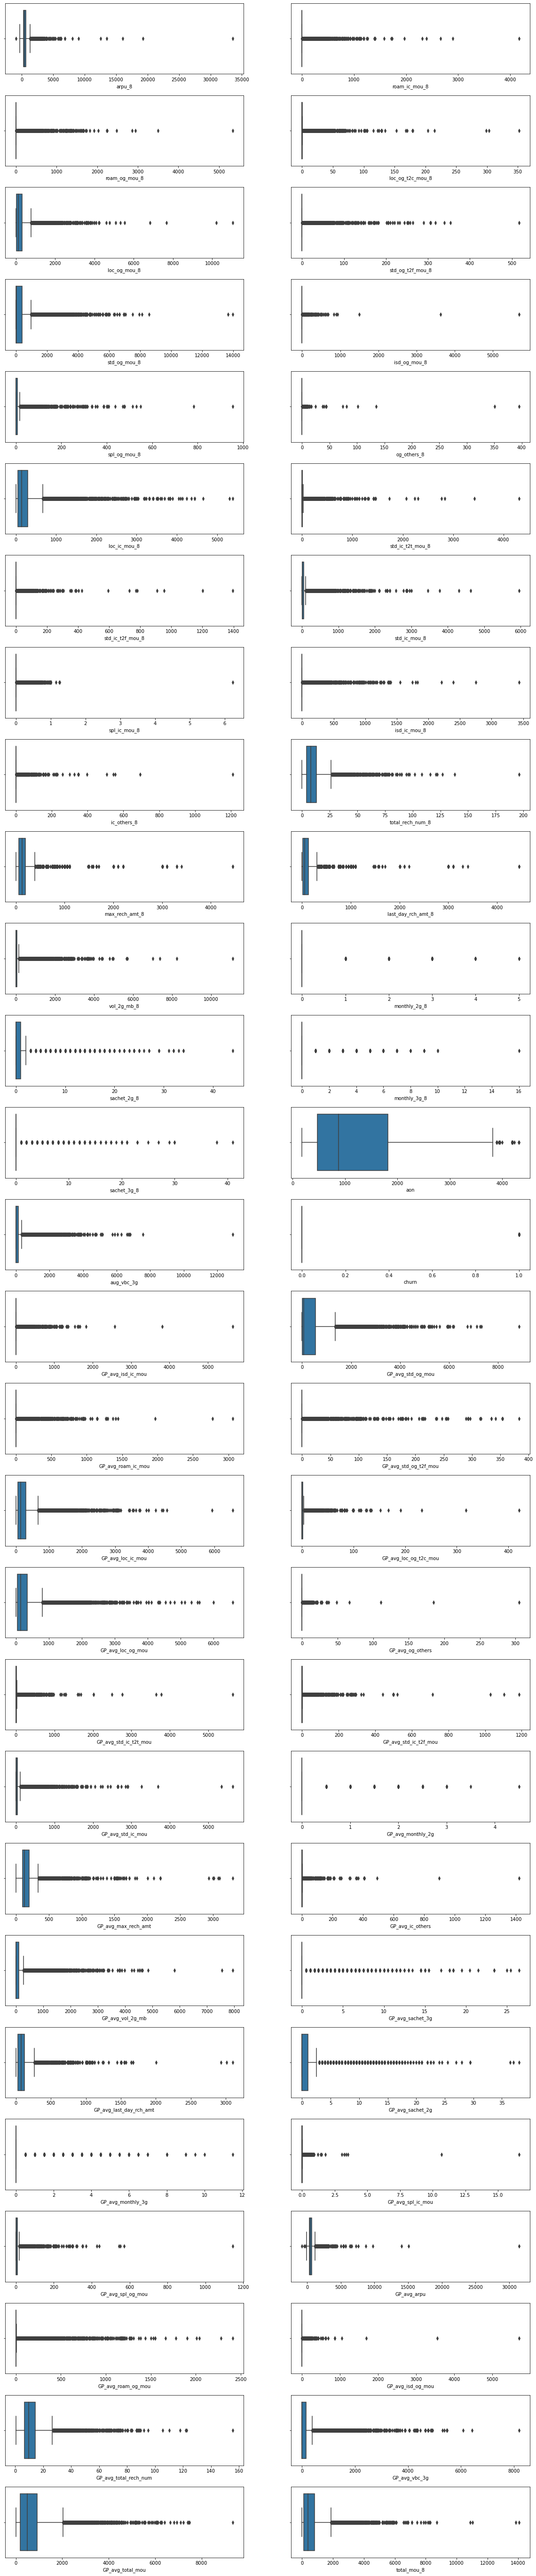

In [351]:
#creating a list of columns
ls_cols = churn_df.columns

#creating a boxplot of all the columns
fig, axes = plt.subplots(len(ls_cols)//2, 2, figsize=(20, 100))
for index, col in enumerate(ls_cols):
    i, j = divmod(index, 2)
    sns.boxplot(churn_df[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

The boxplots further emphasize that we have outliers present in almost every feature. Features will be capped at 90th percentile as we move on to ensure that the outliers don't skew the analysis or the models.

# Outliers treatment

In [352]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   arpu_8                   28504 non-null  float64
 1   roam_ic_mou_8            28504 non-null  float64
 2   roam_og_mou_8            28504 non-null  float64
 3   loc_og_t2c_mou_8         28504 non-null  float64
 4   loc_og_mou_8             28504 non-null  float64
 5   std_og_t2f_mou_8         28504 non-null  float64
 6   std_og_mou_8             28504 non-null  float64
 7   isd_og_mou_8             28504 non-null  float64
 8   spl_og_mou_8             28504 non-null  float64
 9   og_others_8              28504 non-null  float64
 10  loc_ic_mou_8             28504 non-null  float64
 11  std_ic_t2t_mou_8         28504 non-null  float64
 12  std_ic_t2f_mou_8         28504 non-null  float64
 13  std_ic_mou_8             28504 non-null  float64
 14  spl_ic_mou_8          

In our dataset all the columns are numeric types whereas for the churn column our datatype should be object.Hence we make those changes.

In [353]:
# converting churn column into object type

churn_df['churn'] = churn_df['churn'].astype(object)

In [354]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   arpu_8                   28504 non-null  float64
 1   roam_ic_mou_8            28504 non-null  float64
 2   roam_og_mou_8            28504 non-null  float64
 3   loc_og_t2c_mou_8         28504 non-null  float64
 4   loc_og_mou_8             28504 non-null  float64
 5   std_og_t2f_mou_8         28504 non-null  float64
 6   std_og_mou_8             28504 non-null  float64
 7   isd_og_mou_8             28504 non-null  float64
 8   spl_og_mou_8             28504 non-null  float64
 9   og_others_8              28504 non-null  float64
 10  loc_ic_mou_8             28504 non-null  float64
 11  std_ic_t2t_mou_8         28504 non-null  float64
 12  std_ic_t2f_mou_8         28504 non-null  float64
 13  std_ic_mou_8             28504 non-null  float64
 14  spl_ic_mou_8          

In [355]:
# Making a list of only the numeric columns
numeric_cols = churn_df.select_dtypes(exclude=['object']).columns
numeric_cols

Index(['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'GP_avg_isd_ic_mou',
       'GP_avg_std_og_mou', 'GP_avg_roam_ic_mou', 'GP_avg_std_og_t2f_mou',
       'GP_avg_loc_ic_mou', 'GP_avg_loc_og_t2c_mou', 'GP_avg_loc_og_mou',
       'GP_avg_og_others', 'GP_avg_std_ic_t2t_mou', 'GP_avg_std_ic_t2f_mou',
       'GP_avg_std_ic_mou', 'GP_avg_monthly_2g', 'GP_avg_max_rech_amt',
       'GP_avg_ic_others', 'GP_avg_vol_2g_mb', 'GP_avg_sachet_3g',
       'GP_avg_last_day_rch_amt', 'GP_avg_sachet_2g', 'GP_avg_monthly_3g',
       'GP_avg_spl_ic_mou', 'GP_avg_spl_og_mou', '

As we noticed from the above box plots only arpu_8 and GP_avg_arpu has outliers on the lower end. So we will be limit out liers to the 10th and 90th percentile only for these two columns.
For the rest of the columns we will only limit outliers on the higher end to 90.

In [356]:
numeric_cols_upper = [col for col in numeric_cols if 'arpu' not in col]
print(numeric_cols_upper); print()

numeric_cols_upperlower = [col for col in numeric_cols if 'arpu' in col]
print(numeric_cols_upperlower)

['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'GP_avg_isd_ic_mou', 'GP_avg_std_og_mou', 'GP_avg_roam_ic_mou', 'GP_avg_std_og_t2f_mou', 'GP_avg_loc_ic_mou', 'GP_avg_loc_og_t2c_mou', 'GP_avg_loc_og_mou', 'GP_avg_og_others', 'GP_avg_std_ic_t2t_mou', 'GP_avg_std_ic_t2f_mou', 'GP_avg_std_ic_mou', 'GP_avg_monthly_2g', 'GP_avg_max_rech_amt', 'GP_avg_ic_others', 'GP_avg_vol_2g_mb', 'GP_avg_sachet_3g', 'GP_avg_last_day_rch_amt', 'GP_avg_sachet_2g', 'GP_avg_monthly_3g', 'GP_avg_spl_ic_mou', 'GP_avg_spl_og_mou', 'GP_avg_roam_og_mou', 'GP_avg_isd_og_mou', 'GP_avg_total_rech_num', 'GP_avg_vbc_3g', 'GP_avg_total_mou', 'to

In [357]:
# Treating outliers below and above two standard deviations of the mean.

for col in numeric_cols_upperlower: 
    print(f'for column {col}'); print()
    print("before:\n", churn_df[col].describe()); print()
    upper_limit = churn_df[col].mean() + 2 * churn_df[col].std()
    print("upperlimit:", upper_limit);
    lower_limit = churn_df[col].mean() - 2 * churn_df[col].std()
    print("lower_limit:", lower_limit); print()
    churn_df.loc[churn_df[col] < lower_limit, col] = lower_limit
    churn_df.loc[churn_df[col] > upper_limit, col] = upper_limit
    print("after:\n",churn_df[col].describe()); print()

for column arpu_8

before:
 count    28504.000000
mean       526.058843
std        500.754116
min       -945.808000
25%        254.759000
50%        442.791000
75%        672.453250
max      33543.624000
Name: arpu_8, dtype: float64

upperlimit: 1527.5670756630693
lower_limit: -475.44938909275777

after:
 count    28504.000000
mean       507.556942
std        351.559562
min       -475.449389
25%        254.759000
50%        442.791000
75%        672.453250
max       1527.567076
Name: arpu_8, dtype: float64

for column GP_avg_arpu

before:
 count    28504.000000
mean       565.501897
std        430.500472
min       -749.783000
25%        353.956000
50%        489.293000
75%        679.715250
max      31438.461000
Name: GP_avg_arpu, dtype: float64

upperlimit: 1426.502840610532
lower_limit: -295.49904658162905

after:
 count    28504.000000
mean       549.079470
std        296.285867
min       -295.499047
25%        353.956000
50%        489.293000
75%        679.715250
max       1426.50

In [358]:
# Treating outliers above two standard deviations of the mean.
for col in numeric_cols_upper: 
    upper_limit = churn_df[col].mean() + 2 * churn_df[col].std()
    churn_df.loc[churn_df[col] > upper_limit, col] = upper_limit

# EDA

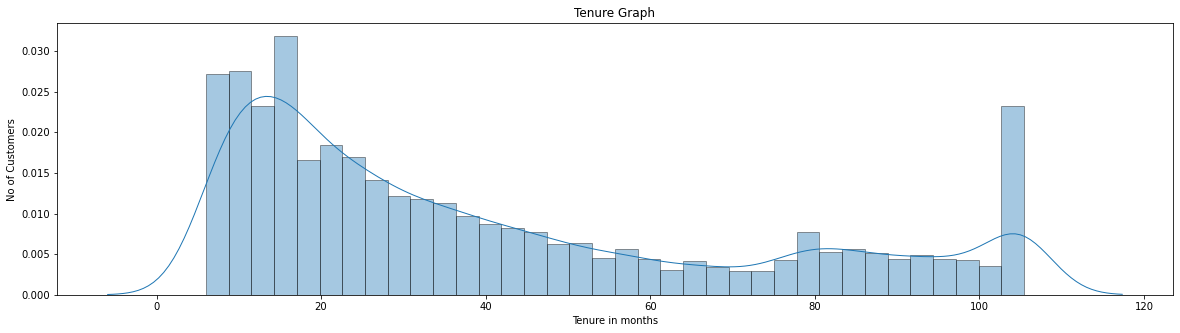

In [359]:
#tenure of customers in months over the network

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.distplot(churn_df['aon']/30, hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')
plt.show()

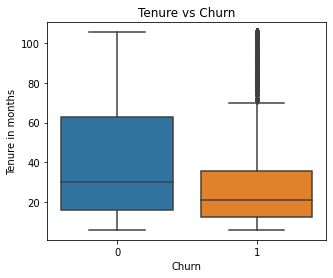

In [360]:
#tenur eof customer split by those that would and wouldn't churn
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.boxplot(x = churn_df.churn, y = churn_df["aon"]/30)
ax.set_ylabel('Tenure in months')
ax.set_xlabel('Churn')
ax.set_title('Tenure vs Churn')
plt.show()

Customes are more likelier to churn with a tenure of 10-35 months 

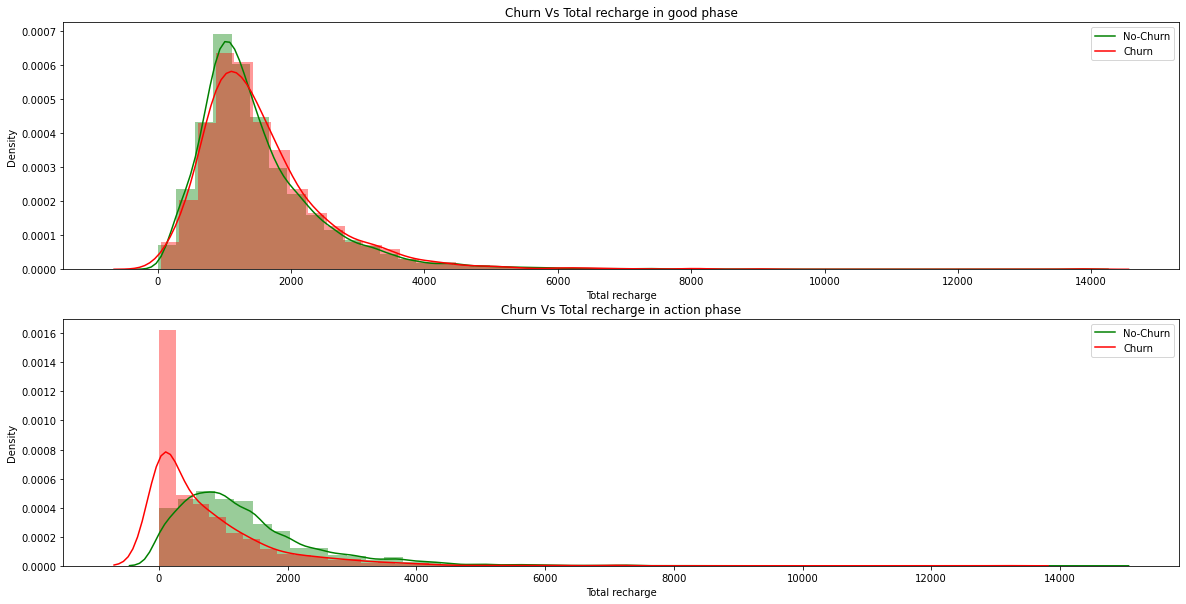

In [361]:
# Churn Vs total recharge

fig, axes = plt.subplots(2,1, figsize=(20, 10))
ax = sns.distplot(  churn_df.GP_avg_max_rech_amt[(churn_df["churn"] == 0)] * churn_df.GP_avg_total_rech_num[(churn_df["churn"] == 0)],
                  color="Green", ax = axes [0])
ax = sns.distplot( churn_df.GP_avg_max_rech_amt[(churn_df["churn"] == 1)]* churn_df.GP_avg_total_rech_num[(churn_df["churn"] == 1)], 
                  color="Red", ax = axes [0])
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total recharge')
ax.set_title('Churn Vs Total recharge in good phase')

ax = sns.distplot(  churn_df.max_rech_amt_8[(churn_df["churn"] == 0)]* churn_df.total_rech_num_8[(churn_df["churn"] == 0)], 
                  color="Green", ax = axes [1])
ax = sns.distplot( churn_df.max_rech_amt_8[(churn_df["churn"] == 1)]* churn_df.total_rech_num_8[(churn_df["churn"] == 1)], 
                  color="Red", ax = axes [1])
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total recharge')
ax.set_title('Churn Vs Total recharge in action phase')
plt.show()

As visible from the graphs above the total recharge done by those about to churn has a drastic difference in the action phase as compared to the good phase where both chruners and non-chruners show similar behaviour

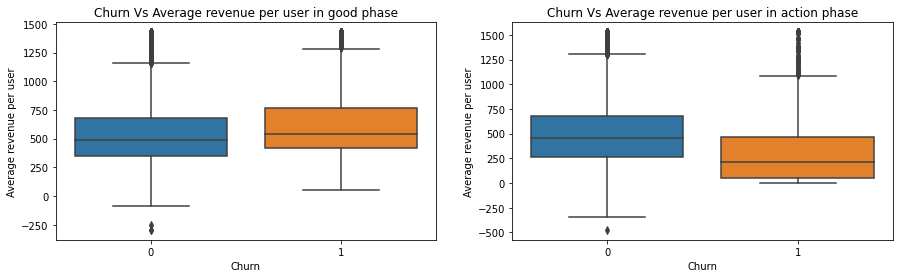

In [362]:
# Churn Vs Average revenue per user

fig, axes = plt.subplots(1,2, figsize=(15, 4))
ax = sns.boxplot( y = churn_df.GP_avg_arpu, x = churn_df.churn ,ax = axes [0])
ax.set_ylabel('Average revenue per user')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Average revenue per user in good phase')

ax = sns.boxplot( y = churn_df.arpu_8, x = churn_df.churn ,ax = axes [1])                   
ax.set_ylabel('Average revenue per user')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Average revenue per user in action phase')
plt.show()

As clearly visible again the action phase shows strong indicatiors of customers who are likely to churn with a sharp drop in revenue from them whereas those likely to stay with the network show little change in revenue.


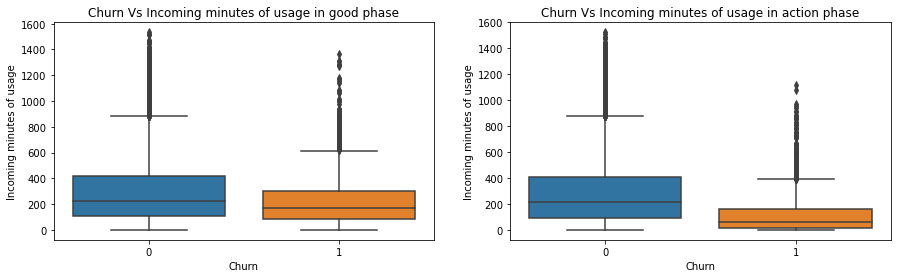

In [363]:
# churn vs incoming minutes of usage

good_phase_incoming = [col for col in churn_df.columns if "ic" in col and "mou" and "GP" in col]
action_phase_incoming = [col for col in churn_df.columns if "ic" in col and "mou" and "8" in col]

churn_df["GP_ic_mou_total"] = churn_df[good_phase_incoming].sum(axis=1)
churn_df["action_ic_mou_total"] = churn_df[action_phase_incoming].sum(axis=1)



fig, axes = plt.subplots(1,2, figsize=(15, 4))
ax = sns.boxplot( y = churn_df.GP_ic_mou_total, x = churn_df.churn ,ax = axes [0])
ax.set_ylabel('Incoming minutes of usage')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Incoming minutes of usage in good phase')

ax = sns.boxplot( y = churn_df.action_ic_mou_total, x = churn_df.churn ,ax = axes [1])                   
ax.set_ylabel('Incoming minutes of usage')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Incoming minutes of usage in action phase')
plt.show()



Drop in incoming minutes of users in the action phase also another clear indicator of the possibility of churning where those likely to churn have incoming minutes lesser than 200 minutes in the action phase

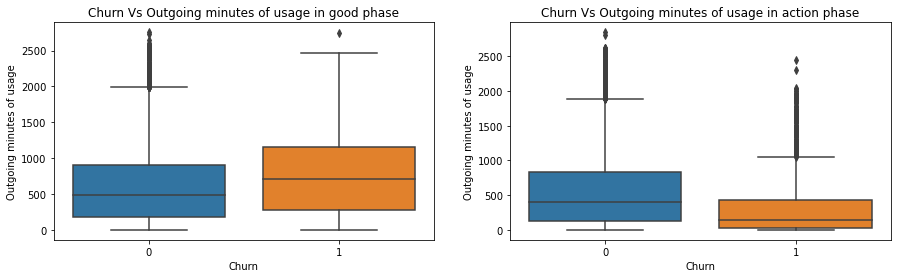

In [364]:
# churn vs outgoing minutes of usage

good_phase_outgoing = [col for col in churn_df.columns if "og" in col and "mou" and "GP" in col]
action_phase_outgoing = [col for col in churn_df.columns if "og" in col and "mou" and "8" in col]

churn_df["GP_og_mou_total"] = churn_df[good_phase_outgoing].sum(axis=1)
churn_df["action_og_mou_total"] = churn_df[action_phase_outgoing].sum(axis=1)



fig, axes = plt.subplots(1,2, figsize=(15, 4))
ax = sns.boxplot( y = churn_df.GP_og_mou_total, x = churn_df.churn ,ax = axes [0])
ax.set_ylabel('Outgoing minutes of usage')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Outgoing minutes of usage in good phase')

ax = sns.boxplot( y = churn_df.action_og_mou_total, x = churn_df.churn ,ax = axes [1])                   
ax.set_ylabel('Outgoing minutes of usage')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Outgoing minutes of usage in action phase')
plt.show()



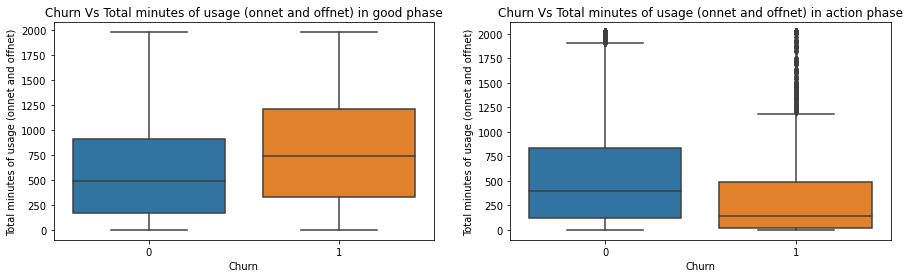

In [365]:
#churn vs Total minutes of usage (onnet and offnet)

fig, axes = plt.subplots(1,2, figsize=(15, 4))
ax = sns.boxplot( y = churn_df.GP_avg_total_mou, x = churn_df.churn ,ax = axes [0])
ax.set_ylabel('Total minutes of usage (onnet and offnet)')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Total minutes of usage (onnet and offnet) in good phase')

ax = sns.boxplot( y = churn_df.total_mou_8, x = churn_df.churn ,ax = axes [1])                   
ax.set_ylabel('Total minutes of usage (onnet and offnet)')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Total minutes of usage (onnet and offnet) in action phase')
plt.show()

As visible from the plots above the total minutes of usage from churners is higher during the good phase and faces a drastic drop in the action phase where the total minutes of usage be it onnet or offnet are lesser than 550 minutes showing high likehood of them churning.

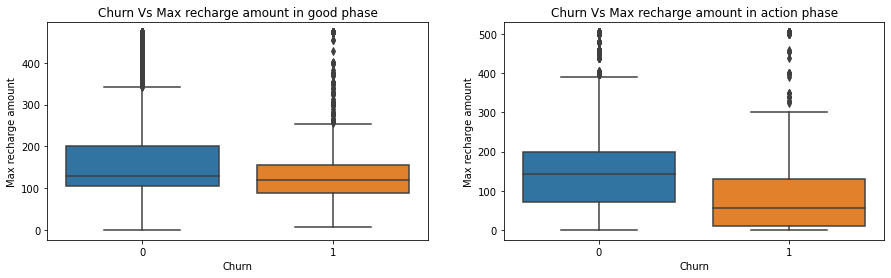

In [366]:
#churn vs Max recharge amount

fig, axes = plt.subplots(1,2, figsize=(15, 4))
ax = sns.boxplot( y = churn_df.GP_avg_max_rech_amt, x = churn_df.churn ,ax = axes [0])
ax.set_ylabel('Max recharge amount')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Max recharge amount in good phase')

ax = sns.boxplot( y = churn_df.max_rech_amt_8, x = churn_df.churn ,ax = axes [1])                   
ax.set_ylabel('Max recharge amount')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Max recharge amount in action phase')
plt.show()


Those with lower maximum recharge amounts have a higher likelihood to churn than those with higer max recharge amounts

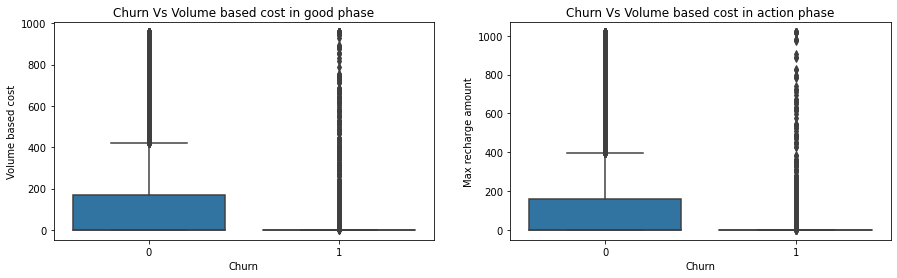

In [367]:
#churn vs Volume based cost
# volume based cost is defined as that in which no specific scheme is purchased and payment is as per usage

fig, axes = plt.subplots(1,2, figsize=(15, 4))
ax = sns.boxplot( y = churn_df.GP_avg_vbc_3g, x = churn_df.churn ,ax = axes [0])
ax.set_ylabel('Volume based cost')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Volume based cost in good phase')

ax = sns.boxplot( y = churn_df.aug_vbc_3g, x = churn_df.churn ,ax = axes [1])                   
ax.set_ylabel('Max recharge amount')
ax.set_xlabel('Churn')
ax.set_title('Churn Vs Volume based cost in action phase')
plt.show()

Customers with volume based cost below 50 in the good and action phase are more likelier to churn.

In [368]:
# Dropping derived EDA columns before we move into data preparation for model building phase
drop_columns = []

churn_df.drop(['GP_ic_mou_total', 'action_ic_mou_total', 'GP_og_mou_total', 'action_og_mou_total'], axis=1, inplace=True)
churn_df.head()


,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,churn,GP_avg_isd_ic_mou,GP_avg_std_og_mou,GP_avg_roam_ic_mou,GP_avg_std_og_t2f_mou,GP_avg_loc_ic_mou,GP_avg_loc_og_t2c_mou,GP_avg_loc_og_mou,GP_avg_og_others,GP_avg_std_ic_t2t_mou,GP_avg_std_ic_t2f_mou,GP_avg_std_ic_mou,GP_avg_monthly_2g,GP_avg_max_rech_amt,GP_avg_ic_others,GP_avg_vol_2g_mb,GP_avg_sachet_3g,GP_avg_last_day_rch_amt,GP_avg_sachet_2g,GP_avg_monthly_3g,GP_avg_spl_ic_mou,GP_avg_spl_og_mou,GP_avg_arpu,GP_avg_roam_og_mou,GP_avg_isd_og_mou,GP_avg_total_rech_num,GP_avg_vbc_3g,GP_avg_total_mou,total_mou_8
0,1527.567076,31.64,38.06,0.000000,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7.0,504.585704,381.285726,0.00,0.0,0.0,0.0,0.0,802.0,57.74,1,8.295,68.000,24.86,13.37,391.555,0.0,478.035,0.0,24.360,39.314243,176.810,0.0,473.260288,15.465,0.000,0.0,0.0,0.0,0.000000,0.105,2.25,1209.515000,18.165,0.090,5.0,19.060000,566.555,378.20
1,137.362000,0.00,0.00,7.150000,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14.0,30.000000,10.000000,0.03,0.0,3.0,0.0,0.0,315.0,21.03,0,0.000,136.870,0.00,0.00,52.630,0.0,333.135,0.0,0.290,0.000000,13.545,0.5,122.000000,0.000,178.000,0.0,25.0,0.5,0.000000,0.000,0.00,435.472000,0.000,0.000,20.0,516.405000,470.005,171.56
2,637.760000,0.00,0.00,0.000000,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27.0,50.000000,50.000000,0.00,0.0,0.0,0.0,0.0,720.0,0.00,0,0.000,848.990,0.00,0.00,106.505,0.0,95.565,0.0,10.020,0.000000,62.985,0.0,50.000000,0.000,0.000,0.0,25.0,0.0,0.000000,0.000,0.00,556.103000,0.000,0.000,24.0,0.000000,944.565,1068.53
3,366.966000,0.00,0.00,16.500254,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4.0,179.000000,0.000000,0.01,0.0,0.0,1.0,1.0,604.0,40.45,0,14.115,4.355,0.00,0.00,145.520,0.0,132.795,0.0,0.255,0.000000,8.915,0.0,89.500000,2.675,0.240,0.0,89.5,0.0,1.000000,0.000,0.05,134.123500,0.000,0.005,4.0,25.930000,137.195,239.47
4,409.230000,0.00,0.00,0.560000,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1.0,455.000000,381.285726,7.97,0.0,0.0,1.0,0.0,1328.0,358.10,0,0.000,0.000,0.00,0.00,2.180,0.0,0.000,0.0,1.455,0.595000,4.420,0.0,473.260288,0.940,72.405,2.0,126.0,0.0,1.341527,0.000,0.00,1426.502841,0.000,0.000,10.5,956.794212,0.000,0.00


In [369]:
churn_df.shape

(28504, 56)

# Data Preperation for model building

In [370]:
y = churn_df['churn']
y = y.astype('int')
X = churn_df.drop('churn', axis=1)

## Standardization

In [371]:
X.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,GP_avg_isd_ic_mou,GP_avg_std_og_mou,GP_avg_roam_ic_mou,GP_avg_std_og_t2f_mou,GP_avg_loc_ic_mou,GP_avg_loc_og_t2c_mou,GP_avg_loc_og_mou,GP_avg_og_others,GP_avg_std_ic_t2t_mou,GP_avg_std_ic_t2f_mou,GP_avg_std_ic_mou,GP_avg_monthly_2g,GP_avg_max_rech_amt,GP_avg_ic_others,GP_avg_vol_2g_mb,GP_avg_sachet_3g,GP_avg_last_day_rch_amt,GP_avg_sachet_2g,GP_avg_monthly_3g,GP_avg_spl_ic_mou,GP_avg_spl_og_mou,GP_avg_arpu,GP_avg_roam_og_mou,GP_avg_isd_og_mou,GP_avg_total_rech_num,GP_avg_vbc_3g,GP_avg_total_mou,total_mou_8
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,507.556942,8.450484,13.734266,1.349062,225.399376,1.002019,281.301563,0.926516,5.711920,0.014593,215.154828,10.858078,1.881139,37.688268,0.018221,7.075732,0.817848,9.807560,153.227217,86.285274,86.374311,0.140275,0.898279,0.161514,0.133162,1218.416417,143.355081,7.514560,329.145769,10.231528,1.180600,221.881973,1.434219,241.047746,0.308052,12.022178,2.044012,40.648287,0.161153,159.910350,0.919076,106.010997,0.154533,93.146727,0.976218,0.174655,0.038084,5.690404,549.079470,16.714392,1.083323,11.482721,140.788829,623.156517,556.402521
std,351.559562,29.303220,44.982935,3.509105,262.217382,3.854404,445.785888,7.730355,10.423440,0.269805,223.238552,27.021916,6.398730,67.328392,0.062107,25.035680,3.346459,7.296682,112.931915,93.087997,185.663831,0.343658,1.776353,0.401778,0.461597,928.407079,279.677018,25.445176,460.156013,29.305726,4.099565,217.433902,3.136819,262.925577,0.827565,27.596615,6.211196,66.493507,0.324741,104.937495,3.390788,194.320071,0.423713,77.094314,1.756501,0.384235,0.082342,9.077904,296.285867,44.825012,7.982030,6.789580,264.412579,539.251255,552.793885
min,-475.449389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-295.499047,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,254.759000,0.000000,0.000000,0.000000,30.705000,0.000000,0.000000,0.000000,0.000000,0.000000,50.255000,0.000000,0.000000,0.910000,0.000000,0.000000,0.000000,4.000000,65.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.000000,0.000000,0.000000,2.438750,0.000000,0.000000,62.157500,0.000000,45.660000,0.000000,0.000000,0.000000,2.945000,0.000000,104.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,353.956000,0.000000,0.000000,6.500000,0.000000,177.847500,113.305000
50%,442.791000,0.000000,0.000000,0.000000,122.700000,0.000000,33.585000,0.000000,0.660000,0.000000,139.290000,0.310000,0.000000,10.690000,0.000000,0.000000,0.000000,8.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,876.000000,0.000000,0.000000,65.370000,0.000000,0.00

In [372]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [373]:
X.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,GP_avg_isd_ic_mou,GP_avg_std_og_mou,GP_avg_roam_ic_mou,GP_avg_std_og_t2f_mou,GP_avg_loc_ic_mou,GP_avg_loc_og_t2c_mou,GP_avg_loc_og_mou,GP_avg_og_others,GP_avg_std_ic_t2t_mou,GP_avg_std_ic_t2f_mou,GP_avg_std_ic_mou,GP_avg_monthly_2g,GP_avg_max_rech_amt,GP_avg_ic_others,GP_avg_vol_2g_mb,GP_avg_sachet_3g,GP_avg_last_day_rch_amt,GP_avg_sachet_2g,GP_avg_monthly_3g,GP_avg_spl_ic_mou,GP_avg_spl_og_mou,GP_avg_arpu,GP_avg_roam_og_mou,GP_avg_isd_og_mou,GP_avg_total_rech_num,GP_avg_vbc_3g,GP_avg_total_mou,total_mou_8
count,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04,2.850400e+04
mean,-4.425858e-17,4.712917e-19,1.351762e-15,-7.487890e-17,-4.502822e-16,-1.107329e-15,3.632607e-16,-2.879135e-16,2.529707e-16,-1.753181e-15,7.552352e-18,3.696933e-16,1.317533e-16,-1.650650e-16,1.125931e-15,-3.373319e-16,4.788811e-16,-5.008935e-18,8.422489e-17,-6.191137e-16,1.397711e-16,-4.733950e-17,-4.720006e-16,-3.529780e-16,3.094038e-15,-3.454062e-17,1.392375e-16,3.479068e-16,-6.815618e-16,-5.597894e-16,1.544072e-15,5.107478e-17,7.037125e-16,2.410209e-16,2.372603e-15,5.917827e-17,4.756541e-17,7.286325e-17,-1.003355e-15,2.443453e-16,-1.637382e-15,-2.650100e-16,-9.497385e-16,4.218100e-16,-3.827044e-16,2.979810e-16,-1.724577e-16,-9.414149e-17,-1.692755e-17,1.322927e-16,-1.437465e-15,1.688626e-16,-9.923300e-16,-6.257663e-17,1.819731e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-2.796179e+00,-2.883858e-01,-3.053270e-01,-3.844529e-01,-8.596048e-01,-2.599717e-01,-6.310350e-01,-1.198563e-01,-5.479976e-01,-5.408954e-02,-9.638058e-01,-4.018319e-01,-2.939914e-01,-5.597777e-01,-2.933907e-01,-2.826309e-01,-2.443964e-01,-1.344136e+00,-1.356834e+00,-9.269378e-01,-4.652270e-01,-4.081898e-01,-5.056962e-01,-4.020045e-01,-2.884853e-01,-1.118512e+00,-5.125827e-01,-2.953287e-01,-7.153042e-01,-3.491368e-01,-2.879868e-01,-1.020475e+00,-4.572288e-01,-9.168069e-01,-3.722452e-01,-4.356473e-01,-3.290908e-01,-6.113228e-01,-4.962614e-01,-1.523890e+00,-2.710556e-01,-5.455579e-01,-3.647174e-01,-1.208239e+00,-5.557843e-01,-4.545617e-01,-4.625168e-01,-6.268521e-01,-2.850603e+00,-3.728875e-01,-1.357226e-01,-1.617613e+00,-5.324682e-01,-1.155616e+00,-1.006546e+00
25%,-7.190883e-01,-2.883858e-01,-3.053270e-01,-3.844529e-01,-7.425053e-01,-2.599717e-01,-6.310350e-01,-1.198563e-01,-5.479976e-01,-5.408954e-02,-7.386839e-01,-4.018319

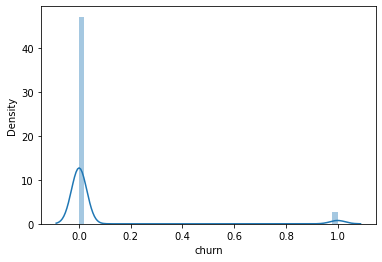

In [374]:
# Distribution of target variable

sns.distplot(churn_df['churn'])
plt.show()

Since our target variable has a class imbalnce we shall now handle the class imbalance using SMOTE

## Handling Class Imbalance

In [375]:
churn_df.churn.value_counts()

0    26908
1     1596
Name: churn, dtype: int64

In [376]:
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [377]:
y_res.value_counts()

0    26908
1    26908
Name: churn, dtype: int64

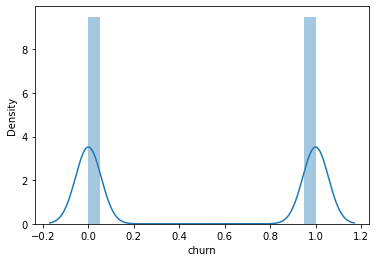

In [378]:
sns.distplot(y_res)
plt.show()

We have now treated our class imbalance as visible above and can proceed forward with model building

### Splitting dataset into train and test

In [379]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

## PCA

In [380]:
X.shape

(28504, 55)

In [381]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(random_state=42)

In [383]:
# Fit train set on PCA
pca.fit(X_train)

# Principal components
pca.components_


array([[ 0.31532411,  0.23453981,  0.23966695, ...,  0.03408653,
         0.19880176,  0.24005858],
       [ 0.09088439, -0.31405694, -0.34769556, ...,  0.17323021,
        -0.19595438, -0.01804491],
       [ 0.11705418, -0.27748949, -0.2288208 , ..., -0.1075829 ,
         0.29308953,  0.23965916],
       ...,
       [ 0.45894563, -0.01039798, -0.04086221, ...,  0.0477376 ,
         0.15822602, -0.22600384],
       [ 0.00951879,  0.00571391, -0.06843905, ...,  0.00712495,
         0.56274526,  0.40671163],
       [-0.07798816, -0.01636267, -0.04691364, ..., -0.00933932,
        -0.42280489,  0.57699856]])

[0.12170677 0.22424772 0.32009314 0.37344713 0.42089966 0.46362294
 0.50375372 0.5404382  0.57052674 0.59787322 0.62433235 0.65026907
 0.67420067 0.69511543 0.71533967 0.73430382 0.75271556 0.76760294
 0.78200656 0.79474402 0.80695951 0.81889996 0.83060176 0.84184071
 0.85283963 0.86265293 0.87171274 0.8805547  0.88893829 0.89716807
 0.90527106 0.91258419 0.91923573 0.92579256 0.9320708  0.93820095
 0.94406755 0.94980235 0.95513833 0.9602275  0.96460545 0.96872117
 0.97271227 0.97656605 0.98024231 0.98380423 0.9871885  0.98991499
 0.99256031 0.9948113  0.99651511 0.99796213 0.99910316 0.99978204
 1.        ]


Text(0, 0.5, 'Cumulative Variance')

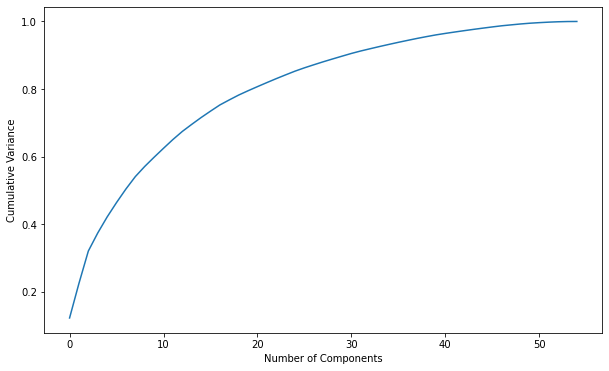

In [384]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 40 components explain amost more than 90% variance of the data. So, we will perform PCA with 40 components.

In [389]:
# Performing PCA with 40 components

# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA


# Instantiate PCA with 40 components
pca_final = IncrementalPCA(n_components=40)



# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [390]:
# Applying PCA on the test set

X_test_pca = pca_final.transform(X_test)

# Model Building

## 1. Logistic Regression

We will first conduct logistic regression without PCA to find out strong predictor variable as PCA won't allow us to do that.

In [240]:
import statsmodels.api as sm

# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37671
Model:                            GLM   Df Residuals:                    37615
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15111.
Date:                Tue, 14 Mar 2023   Deviance:                       30222.
Time:                        15:51:26   Pearson chi2:                 1.03e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.5981      0.024    -66.719      0.000      -1.645      -1.551
arpu_8                      0.3702      0.047      7.935      0.000       0.279       0.462
roam_ic_mou_8               0.0307      0.025      1.213      0.225      -0.019       0.080
roam_og_mou_8               0.2571      0.026      9.966      0.000       0.207       0.308
loc_og_t2c_mou_8            0.1140      0.022      5.139      0.000       0.071       0.158
loc_og_mou_8               -0.1711      0.064     -2.664      0.008      -0.297      -0.045
std_og_t2f_mou_8           -0.1326      0.030     -4.496      0.000      -0.190      -0.075
std_og_mou_8                0.1565      0.087      1.799      0.072      -0.014       0.327
isd_og_mou_8               -0.0543      0.025     -2.204      0.028      -0.103      -0.006
spl_og_mou_8               -0.0478      0.025     -1.886      0.059      -0.097       0.002
og_others_8                -0.0395      0.025     -1.610      0.107      -0.088       0.009
loc_ic_mou_8               -1.1662      0.049    -23.807      0.000      -1.262      -1.070
std_ic_t2t_mou_8           -0.0276      0.035     -0.792      0.428      -0.096       0.041
std_ic_t2f_mou_8           -0.0804      0.029     -2.790      0.005      -0.137      -0.024
std_ic_mou_8               -0.3469      0.040     -8.616      0.000      -0.426      -0.268
spl_ic_mou_8               -0.5807      0.027    -21.204      0.000      -0.634      -0.527
isd_ic_mou_8               -0.0293      0.029     -1.026      0.305      -0.085       0.027
ic_others_8                 0.0583      0.019      3.011      0.003       0.020       0.096
total_rech_num_8           -0.5555      0.033    -16.814      0.000      -0.620      -0.491
max_rech_amt_8              0.1706      0.027      6.382      0.000       0.118       0.223
last_day_rch_amt_8         -0.6455      0.023    -28.352      0.000      -0.690      -0.601
vol_2g_mb_8                -0.2784      0.028     -9.823      0.000      -0.334      -0.223
monthly_2g_8               -0.4960      0.030    -16.807      0.000      -0.554      -0.438
sachet_2g_8                -0.4420      0.029    -15.458      0.000      -0.498      -0.386
monthly_3g_8               -0.7174      0.032    -22.372      0.000      -0.780      -0.655
sachet_3g_8                -0.1641      0.023     -7.063      0.000      -0.210      -0.119
aon                        -0.3768      0.019    -20.127      0.000      -0.413      -0.340
aug_vbc_3g                 -0.3088      0.033     -9.337      0.000      -0.374      -0.244
GP_avg_isd_ic_mou           0.0877      0.026      3.362      0.001       0.037       0.139
GP_avg_std_og_mou          -0.1492      0.076     -1.952      0.051      -0.299       0.001
GP_avg_roam_ic_mou          0.0461      0.030  

### RFE for Feature Selection

In [241]:
# Since our model has too many features we will automate the process of feature selection using RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

# Run RFE for 20 features
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [242]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aon', 'GP_avg_loc_ic_mou', 'GP_avg_loc_og_mou',
       'GP_avg_monthly_2g', 'GP_avg_vol_2g_mb', 'GP_avg_arpu',
       'GP_avg_total_mou', 'total_mou_8'],
      dtype='object')

In [243]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37671
Model:                            GLM   Df Residuals:                    37650
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15382.
Date:                Tue, 14 Mar 2023   Deviance:                       30765.
Time:                        15:51:31   Pearson chi2:                 9.05e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5193      0.023    -66.360      0.000      -1.564      -1.474
arpu_8                 0.2148      0.039      5.486      0.000       0.138       0.292
roam_og_mou_8          0.3446      0.015     22.461      0.000       0.315       0.375
std_og_mou_8           0.1801      0.055      3.292      0.001       0.073       0.287
loc_ic_mou_8          -1.2369      0.045    -27.712      0.000      -1.324      -1.149
std_ic_mou_8          -0.2667      0.020    -13.019      0.000      -0.307      -0.227
spl_ic_mou_8          -0.5896      0.027    -21.785      0.000      -0.643      -0.537
total_rech_num_8      -0.4872      0.022    -21.776      0.000      -0.531      -0.443
last_day_rch_amt_8    -0.5972      0.020    -29.167      0.000      -0.637      -0.557
vol_2g_mb_8           -0.2982      0.028    -10.749      0.000      -0.353      -0.244
monthly_2g_8          -0.4543      0.028    -16.232      0.000      -0.509      -0.399
sachet_2g_8           -0.4210      0.023    -18.648      0.000      -0.465      -0.377
monthly_3g_8          -0.6039      0.024    -25.269      0.000      -0.651      -0.557
aon                   -0.3775      0.018    -21.057      0.000      -0.413      -0.342
GP_avg_loc_ic_mou      0.5805      0.036     15.918      0.000       0.509       0.652
GP_avg_loc_og_mou     -0.2721      0.032     -8.497      0.000      -0.335      -0.209
GP_avg_monthly_2g     -0.2502      0.023    -10.883      0.000      -0.295      -0.205
GP_avg_vol_2g_mb       0.2532      0.021     11.882      0.000       0.211       0.295
GP_avg_arpu            0.3416      0.030     11.421      0.000       0.283       0.400
GP_avg_total_mou       0.4596      0.033     13.752      0.000       0.394       0.525
total_mou_8           -0.8949      0.069    -13.058      0.000      -1.029      -0.761
======================================================================================
"""

In [244]:
# Check the VIF. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe with names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = X_train[rfe_col].columns

vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,total_mou_8,15.21
2,std_og_mou_8,9.23
0,arpu_8,7.46
3,loc_ic_mou_8,4.99
18,GP_avg_total_mou,4.63
13,GP_avg_loc_ic_mou,4.47
17,GP_avg_arpu,3.84
14,GP_avg_loc_og_mou,3.72
6,total_rech_num_8,2.26
8,vol_2g_mb_8,2.03


We do not have any significant p values but the VIF for `total_mou_8` is very high and hence we drop it as it seems to be explained by other features

In [245]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy of our model is : {round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted) * 100, 2)}%')

[[15293  3510]
 [ 3115 15753]]

Accuracy of our model is : 82.41%


In [246]:
rfe_col = rfe_col.drop('total_mou_8', 1)

In [247]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37671
Model:                            GLM   Df Residuals:                    37651
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15473.
Date:                Tue, 14 Mar 2023   Deviance:                       30947.
Time:                        15:52:22   Pearson chi2:                 8.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4978      0.023    -66.094      0.000      -1.542      -1.453
arpu_8                -0.0525      0.034     -1.564      0.118      -0.118       0.013
roam_og_mou_8          0.2788      0.014     19.538      0.000       0.251       0.307
std_og_mou_8          -0.4008      0.031    -13.113      0.000      -0.461      -0.341
loc_ic_mou_8          -1.3974      0.043    -32.340      0.000      -1.482      -1.313
std_ic_mou_8          -0.2504      0.020    -12.377      0.000      -0.290      -0.211
spl_ic_mou_8          -0.5840      0.027    -21.655      0.000      -0.637      -0.531
total_rech_num_8      -0.4888      0.022    -21.927      0.000      -0.533      -0.445
last_day_rch_amt_8    -0.5990      0.020    -29.365      0.000      -0.639      -0.559
vol_2g_mb_8           -0.2787      0.028    -10.048      0.000      -0.333      -0.224
monthly_2g_8          -0.4381      0.028    -15.656      0.000      -0.493      -0.383
sachet_2g_8           -0.4176      0.023    -18.512      0.000      -0.462      -0.373
monthly_3g_8          -0.5746      0.024    -24.092      0.000      -0.621      -0.528
aon                   -0.3750      0.018    -21.014      0.000      -0.410      -0.340
GP_avg_loc_ic_mou      0.6953      0.035     19.666      0.000       0.626       0.765
GP_avg_loc_og_mou     -0.4849      0.027    -17.654      0.000      -0.539      -0.431
GP_avg_monthly_2g     -0.2623      0.023    -11.403      0.000      -0.307      -0.217
GP_avg_vol_2g_mb       0.2339      0.021     10.970      0.000       0.192       0.276
GP_avg_arpu            0.4496      0.029     15.549      0.000       0.393       0.506
GP_avg_total_mou       0.3358      0.032     10.562      0.000       0.273       0.398
======================================================================================
"""

In [248]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,5.60
3,loc_ic_mou_8,4.52
18,GP_avg_total_mou,4.25
13,GP_avg_loc_ic_mou,4.19
17,GP_avg_arpu,3.54
2,std_og_mou_8,3.44
14,GP_avg_loc_og_mou,2.69
6,total_rech_num_8,2.26
8,vol_2g_mb_8,2.02
16,GP_avg_vol_2g_mb,1.88


In [249]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy of our model is : {round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted) * 100, 2)}%')

[[15293  3510]
 [ 3173 15695]]

Accuracy of our model is : 82.26%


Our model lost a little bit of accuracy with the dropped feature, we shall go forward and drop the next feature with the highest VIF.

In [250]:
# Drop 'arpu_8'
rfe_col = rfe_col.drop('arpu_8', 1)

In [251]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37671
Model:                            GLM   Df Residuals:                    37652
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15475.
Date:                Tue, 14 Mar 2023   Deviance:                       30949.
Time:                        15:54:53   Pearson chi2:                 9.21e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4996      0.023    -66.187      0.000      -1.544      -1.455
roam_og_mou_8          0.2706      0.013     20.418      0.000       0.245       0.297
std_og_mou_8          -0.4270      0.026    -16.721      0.000      -0.477      -0.377
loc_ic_mou_8          -1.4168      0.041    -34.182      0.000      -1.498      -1.336
std_ic_mou_8          -0.2526      0.020    -12.501      0.000      -0.292      -0.213
spl_ic_mou_8          -0.5845      0.027    -21.670      0.000      -0.637      -0.532
total_rech_num_8      -0.5007      0.021    -23.854      0.000      -0.542      -0.460
last_day_rch_amt_8    -0.6091      0.019    -31.443      0.000      -0.647      -0.571
vol_2g_mb_8           -0.2808      0.028    -10.132      0.000      -0.335      -0.226
monthly_2g_8          -0.4429      0.028    -15.920      0.000      -0.497      -0.388
sachet_2g_8           -0.4174      0.023    -18.501      0.000      -0.462      -0.373
monthly_3g_8          -0.5814      0.023    -24.804      0.000      -0.627      -0.535
aon                   -0.3771      0.018    -21.182      0.000      -0.412      -0.342
GP_avg_loc_ic_mou      0.7062      0.035     20.374      0.000       0.638       0.774
GP_avg_loc_og_mou     -0.4968      0.026    -18.829      0.000      -0.549      -0.445
GP_avg_monthly_2g     -0.2611      0.023    -11.356      0.000      -0.306      -0.216
GP_avg_vol_2g_mb       0.2352      0.021     11.043      0.000       0.193       0.277
GP_avg_arpu            0.4252      0.024     17.509      0.000       0.378       0.473
GP_avg_total_mou       0.3543      0.029     12.013      0.000       0.296       0.412
======================================================================================
"""

In [252]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_mou_8,4.11
12,GP_avg_loc_ic_mou,4.00
17,GP_avg_total_mou,3.56
16,GP_avg_arpu,2.53
13,GP_avg_loc_og_mou,2.44
1,std_og_mou_8,2.38
7,vol_2g_mb_8,2.02
5,total_rech_num_8,1.95
15,GP_avg_vol_2g_mb,1.88
8,monthly_2g_8,1.83


In [253]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy of our model is : {round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted) * 100, 2)}%')

[[15288  3515]
 [ 3177 15691]]

Accuracy of our model is : 82.24%


In [254]:
# Drop 'loc_ic_mou_8'
rfe_col = rfe_col.drop('loc_ic_mou_8', 1)

In [255]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37671
Model:                            GLM   Df Residuals:                    37653
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16226.
Date:                Tue, 14 Mar 2023   Deviance:                       32453.
Time:                        15:55:26   Pearson chi2:                 8.42e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2909      0.020    -64.180      0.000      -1.330      -1.251
roam_og_mou_8          0.3319      0.013     25.061      0.000       0.306       0.358
std_og_mou_8          -0.5380      0.025    -21.361      0.000      -0.587      -0.489
std_ic_mou_8          -0.3533      0.020    -17.490      0.000      -0.393      -0.314
spl_ic_mou_8          -0.6137      0.027    -22.670      0.000      -0.667      -0.561
total_rech_num_8      -0.6477      0.020    -32.060      0.000      -0.687      -0.608
last_day_rch_amt_8    -0.7185      0.019    -37.714      0.000      -0.756      -0.681
vol_2g_mb_8           -0.2911      0.027    -10.670      0.000      -0.345      -0.238
monthly_2g_8          -0.4766      0.027    -17.579      0.000      -0.530      -0.423
sachet_2g_8           -0.4178      0.022    -18.840      0.000      -0.461      -0.374
monthly_3g_8          -0.6048      0.023    -26.392      0.000      -0.650      -0.560
aon                   -0.4325      0.017    -25.347      0.000      -0.466      -0.399
GP_avg_loc_ic_mou     -0.1463      0.022     -6.617      0.000      -0.190      -0.103
GP_avg_loc_og_mou     -0.6206      0.025    -25.062      0.000      -0.669      -0.572
GP_avg_monthly_2g     -0.2590      0.022    -11.687      0.000      -0.302      -0.216
GP_avg_vol_2g_mb       0.2369      0.021     11.376      0.000       0.196       0.278
GP_avg_arpu            0.4510      0.024     19.114      0.000       0.405       0.497
GP_avg_total_mou       0.4814      0.029     16.629      0.000       0.425       0.538
======================================================================================
"""

In [256]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,GP_avg_total_mou,3.55
15,GP_avg_arpu,2.52
12,GP_avg_loc_og_mou,2.42
1,std_og_mou_8,2.37
11,GP_avg_loc_ic_mou,2.11
6,vol_2g_mb_8,2.02
14,GP_avg_vol_2g_mb,1.88
4,total_rech_num_8,1.85
7,monthly_2g_8,1.82
13,GP_avg_monthly_2g,1.81


In [257]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy of our model is : {round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted) * 100, 2)}%')

[[15143  3660]
 [ 3543 15325]]

Accuracy of our model is : 80.88%


We lost 2% of our accuracy with the last feature that was dropped. However, we shall continue and see the impact that dropping the next featuere has on accuracy otherwise we shall consider the previous model if the model performace drops drastically 

In [258]:
# Drop 'GP_avg_total_mou'
rfe_col = rfe_col.drop('GP_avg_total_mou', 1)

In [259]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37671
Model:                            GLM   Df Residuals:                    37654
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16369.
Date:                Tue, 14 Mar 2023   Deviance:                       32738.
Time:                        15:58:28   Pearson chi2:                 7.75e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3184      0.020    -64.749      0.000      -1.358      -1.279
roam_og_mou_8          0.3693      0.013     28.298      0.000       0.344       0.395
std_og_mou_8          -0.2778      0.019    -14.632      0.000      -0.315      -0.241
std_ic_mou_8          -0.3845      0.020    -19.053      0.000      -0.424      -0.345
spl_ic_mou_8          -0.6188      0.027    -22.873      0.000      -0.672      -0.566
total_rech_num_8      -0.7060      0.020    -35.401      0.000      -0.745      -0.667
last_day_rch_amt_8    -0.7939      0.019    -42.507      0.000      -0.831      -0.757
vol_2g_mb_8           -0.2726      0.027     -9.940      0.000      -0.326      -0.219
monthly_2g_8          -0.4912      0.027    -18.049      0.000      -0.545      -0.438
sachet_2g_8           -0.4419      0.022    -19.891      0.000      -0.485      -0.398
monthly_3g_8          -0.7063      0.023    -30.953      0.000      -0.751      -0.662
aon                   -0.4614      0.017    -27.057      0.000      -0.495      -0.428
GP_avg_loc_ic_mou     -0.1922      0.022     -8.637      0.000      -0.236      -0.149
GP_avg_loc_og_mou     -0.4781      0.023    -20.678      0.000      -0.523      -0.433
GP_avg_monthly_2g     -0.2998      0.022    -13.455      0.000      -0.344      -0.256
GP_avg_vol_2g_mb       0.1928      0.021      9.252      0.000       0.152       0.234
GP_avg_arpu            0.6843      0.020     34.651      0.000       0.646       0.723
======================================================================================
"""

In [260]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,GP_avg_loc_og_mou,2.23
11,GP_avg_loc_ic_mou,2.09
6,vol_2g_mb_8,2.01
14,GP_avg_vol_2g_mb,1.84
7,monthly_2g_8,1.82
13,GP_avg_monthly_2g,1.80
4,total_rech_num_8,1.77
1,std_og_mou_8,1.74
8,sachet_2g_8,1.57
15,GP_avg_arpu,1.55


In [263]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy of our model is : {round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted) * 100, 2)}%')

[[14970  3833]
 [ 3479 15389]]

Accuracy of our model is : 80.59%


Our VIF values now are within and accpetable range without too much impact on model performance. 
We shall now proceed to find out the performance of our model across other metrics.

In [264]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [266]:
# Calculating the sensitivity of the logistic regression model
logrg_sensitivity = TP / float(TP+FN)
logrg_sensitivity

0.8156137375450498

In [268]:
# Calculating the specificity of the logistic regression model
logrg_specificity = TN / float(TN+FP)
logrg_specificity

0.7961495506036271

In [270]:
# Calculating the false postive rate - predicting churn incorrectly
logrg_FPR = print(FP/ float(TN+FP))
logrg_FPR

0.20385044939637292


In [271]:
# Calculating the positive predictive value - How many positives were correctly predicted
logrg_PPV = print (TP / float(TP+FP))

0.8005930704401207


In [272]:
# Calculating the Negative predictive value - How many negatives were correctly predicted
logrg_NPV = print (TN / float(TN+ FN))

0.8114260935552062


### Plotting ROC

In [273]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic plot')
    plt.legend(loc="lower right")
    plt.show()

    return None

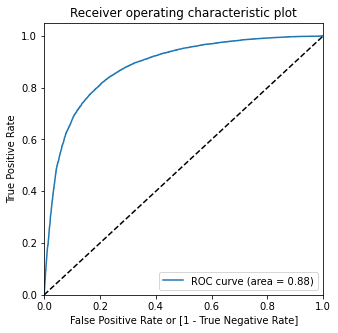

In [274]:
# plotting the ROC curve for the model
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Optimal cutoff point

In [275]:
# Creating different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.609149,1,1,1,1,1,1,1,1,0,0,0
1,1,0.785408,1,1,1,1,1,1,1,1,1,0,0
2,0,0.067358,0,1,0,0,0,0,0,0,0,0,0
3,0,0.014492,0,1,0,0,0,0,0,0,0,0,0
4,0,0.652641,1,1,1,1,1,1,1,1,0,0,0


In [277]:
# Calcultaing accuracy sensitivity and specificity for the varying probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500863     1.000000     0.000000
0.1          0.1  0.655332     0.979595     0.329947
0.2          0.2  0.730190     0.949915     0.509706
0.3          0.3  0.770513     0.914246     0.626283
0.4          0.4  0.796475     0.871158     0.721534
0.5          0.5  0.805898     0.815614     0.796150
0.6          0.6  0.802182     0.748251     0.856300
0.7          0.7  0.781689     0.656296     0.907515
0.8          0.8  0.738021     0.530581     0.946179
0.9          0.9  0.618035     0.255830     0.981492


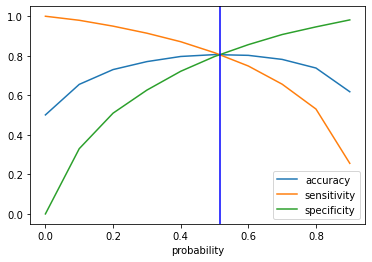

In [285]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.axvline(x = 0.515, color = 'b')
plt.show()

Our **optimal cutoff threshold** is shown as **0.515** for our model.

In [286]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.515 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
48309,1,0.946327,1
52309,1,0.555795,1
1947,0,0.041903,0
14340,0,0.006810,0
12024,0,0.016792,0


In [289]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall model accuracy.
print(f'Logistic regression test prediction accuracy : {round(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)*100,2)}%')

[[6530 1575]
 [1641 6399]]

Logistic regression test prediction accuracy : 80.08%


In [300]:
#print precision value of model
train_precision = metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
test_precision = metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)

print(f'The precision of the model of train data is {train_precision}')
print(f'The precision of the model of test data is {test_precision}'); print()



#print recall value of model
train_recall = metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
test_recall = metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted)

print(f'The recall of the model of train data is {train_recall}')
print(f'The recall of the model of train data is {test_recall}')

The precision of the model of train data is 0.8005930704401207
The precision of the model of test data is 0.8024830699774267

The recall of the model of train data is 0.8156137375450498
The recall of the model of train data is 0.7958955223880597


<br>
Our logistic regression model gives us a train accuracy of 80.59% and test accuracy of 80.08% which is acceptable and shows that the model performs equally well on both train and test data.

However, sensitivity/recall is our most important metric as we need to correctly identify those likely to churn as customer retention is the priority and new customer acquisition is costly. Our current recall is at 79.58%. We shall further create more models to see if we can imporve this score. 

In [519]:
# Top 10 predictors from our logistic regression model
logrg_top10 = abs(res.params).sort_values(ascending=False)[1:11]
logrg_top10

last_day_rch_amt_8    0.793903
monthly_3g_8          0.706257
total_rech_num_8      0.705996
GP_avg_arpu           0.684334
spl_ic_mou_8          0.618816
monthly_2g_8          0.491229
GP_avg_loc_og_mou     0.478089
aon                   0.461352
sachet_2g_8           0.441903
std_ic_mou_8          0.384481
dtype: float64

In [523]:
for i in logrg_top10.index:
    print(i)

last_day_rch_amt_8
monthly_3g_8
total_rech_num_8
GP_avg_arpu
spl_ic_mou_8
monthly_2g_8
GP_avg_loc_og_mou
aon
sachet_2g_8
std_ic_mou_8


<br><br>
The top 10 features derived from our logistic regression will be those that need to be concentrated in order to indentify those customers that i likely to churn.
<br>
Most of the identifying features also belong to the action phase. 

## Logistic Regression using PCA

Tuning hyperparameter C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [396]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [397]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [400]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test recall is {0} at C = {1}".format(best_score, best_C))

 The highest test recall is 0.8271241371180743 at C = 0.01


### Logistic regression with optimal C

In [402]:
# Instantiate the model with best C
logrg_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
logrg_pca_mod = logrg_pca.fit(X_train_pca, y_train)

In [404]:
# Predictions on the train set
y_train_pred = logrg_pca_mod.predict(X_train_pca)

In [415]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

print()

print(f'Accuracy:- {round(metrics.accuracy_score(y_train, y_train_pred)*100,2)}%')

# Sensitivity
print(f'Sensitivity/Recall:- {round(metrics.recall_score(y_train, y_train_pred)*100,2)}%')
      
# Specificity
print(f'Precision :- {round(metrics.precision_score(y_train, y_train_pred)*100,2)}%')

# F1 score:
print(f'F1 score :- {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%')



[[15366  3437]
 [ 3259 15609]]

Accuracy:- 82.23%
Sensitivity/Recall:- 82.73%
Precision :- 81.95%
F1 score :- 82.34%


In [453]:
# Prediction on the test set
y_test_pred = logrg_pca_mod.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print()

print(f'Accuracy:- {round(metrics.accuracy_score(y_test, y_test_pred)*100,2)}%')

# Sensitivity
print(f'Sensitivity/Recall:- {round(metrics.recall_score(y_test, y_test_pred)*100,2)}%')
      
# Specificity
print(f'Precision :- {round(metrics.precision_score(y_test, y_test_pred)*100,2)}%')

# F1 score:
print(f'F1 score :- {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%')

[[6605 1500]
 [1466 6574]]

Accuracy:- 81.63%
Sensitivity/Recall:- 81.77%
Precision :- 81.42%
F1 score :- 81.59%


Using PCA with logistic regression led to improvement not just in model performance but also in having better recall which is our most important metric

## 2. Decission Tree

In [420]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.9341934113774522
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      8105
           1       0.88      0.92      0.90      8040

    accuracy                           0.90     16145
   macro avg       0.90      0.90      0.90     16145
weighted avg       0.90      0.90      0.90     16145



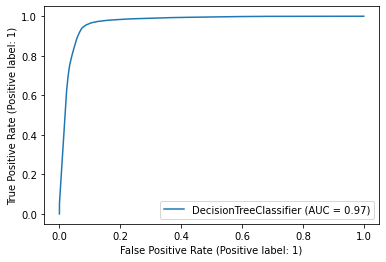

In [437]:
# Plot ROC curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(intial_dt, X_train, y_train)

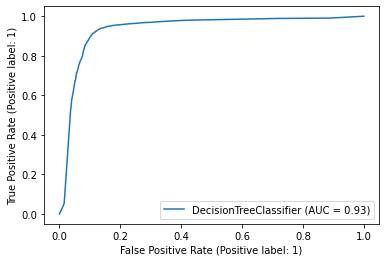

In [438]:
RocCurveDisplay.from_estimator(intial_dt, X_test, y_test)

### Hyperparameter tuning

In [439]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [440]:
grid_search.best_score_

0.9126383681477901

In [441]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

In [447]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92      8105
           1       0.90      0.94      0.92      8040

    accuracy                           0.92     16145
   macro avg       0.92      0.92      0.92     16145
weighted avg       0.92      0.92      0.92     16145

0.9432835820895522


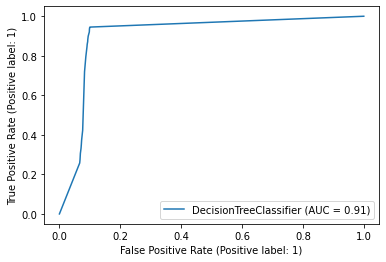

In [512]:
RocCurveDisplay.from_estimator(dt_best, X_test, y_test)
plt.show()

After hypertuning we have an overall accuracy of 92% and our recall is approximately 94% which means we ale to identify almost 94% of those customers who are likely to churn

## Decision tree with PCA

In [449]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [450]:

# Printing the optimal sensitivity score and hyperparameters
print("Best recall:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best recall:- 0.834534431533231
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [474]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [475]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

print()

print(f'Accuracy:- {round(metrics.accuracy_score(y_train, y_train_pred)*100,2)}%')

# Sensitivity
print(f'Sensitivity/Recall:- {round(metrics.recall_score(y_train, y_train_pred)*100,2)}%')
      
# Specificity
print(f'Precision :- {round(metrics.precision_score(y_train, y_train_pred)*100,2)}%')

# F1 score:
print(f'F1 score :- {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%')

[[15748  3055]
 [ 2488 16380]]

Accuracy:- 85.29%
Sensitivity/Recall:- 86.81%
Precision :- 84.28%
F1 score :- 85.53%


In [476]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print()

print(f'Accuracy:- {round(metrics.accuracy_score(y_test, y_test_pred)*100,2)}%')

# Sensitivity
print(f'Sensitivity/Recall:- {round(metrics.recall_score(y_test, y_test_pred)*100,2)}%')
      
# Specificity
print(f'Precision :- {round(metrics.precision_score(y_test, y_test_pred)*100,2)}%')

# F1 score:
print(f'F1 score :- {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%')

[[6518 1587]
 [1270 6770]]

Accuracy:- 82.3%
Sensitivity/Recall:- 84.2%
Precision :- 81.01%
F1 score :- 82.58%


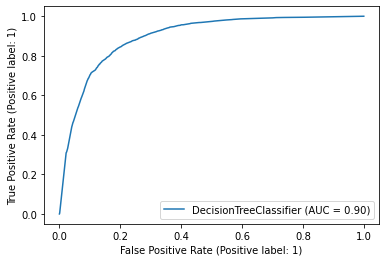

In [458]:
RocCurveDisplay.from_estimator(dt_pca_model, X_test_pca, y_test)
plt.show()

The performance of our decision tree model has dropped while using PCA as compared to the model without PCA as seen above. The impact is seen not only on the accuracy but also the recall rate.

## 3. Random Forest

In [457]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.9341934113774522
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8105
           1       0.92      0.92      0.92      8040

    accuracy                           0.92     16145
   macro avg       0.92      0.92      0.92     16145
weighted avg       0.92      0.92      0.92     16145



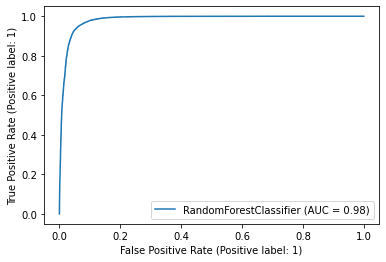

In [460]:
# Plotting ROC for train predictions
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

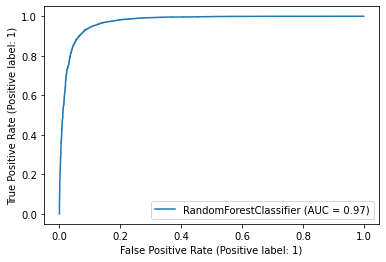

In [461]:
# Plotting ROC for test predictions
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

### Hyperparameter tuning

In [462]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [463]:
grid_search.best_score_

0.9456347222967333

In [464]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [465]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8105
           1       0.95      0.96      0.95      8040

    accuracy                           0.95     16145
   macro avg       0.95      0.95      0.95     16145
weighted avg       0.95      0.95      0.95     16145



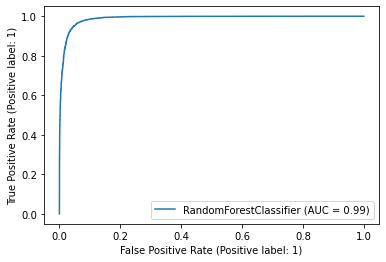

In [466]:
RocCurveDisplay.from_estimator(rf_best, X_test, y_test)
plt.show()

Our random forest model seems to be the best performing one so far and has 95% accuracy with 96% recall rate making it the best performing model for identifying customers who are likely to churn

## XGBoost

In [479]:
from xgboost import XGBClassifier

In [500]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [501]:
# make predictions for test data
y_train_pred = XGB_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

print()

print(f'Accuracy:- {round(metrics.accuracy_score(y_train, y_train_pred)*100,2)}%')

# Sensitivity
print(f'Sensitivity/Recall:- {round(metrics.recall_score(y_train, y_train_pred)*100,2)}%')
      
# Specificity
print(f'Precision :- {round(metrics.precision_score(y_train, y_train_pred)*100,2)}%')

# F1 score:
print(f'F1 score :- {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%')

[[18744    59]
 [   86 18782]]

Accuracy:- 99.62%
Sensitivity/Recall:- 99.54%
Precision :- 99.69%
F1 score :- 99.62%


In [493]:
# make predictions for test data
y_test_pred = XGB_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print()

print(f'Accuracy:- {round(metrics.accuracy_score(y_test, y_test_pred)*100,2)}%')

# Sensitivity
print(f'Sensitivity/Recall:- {round(metrics.recall_score(y_test, y_test_pred)*100,2)}%')
      
# Specificity
print(f'Precision :- {round(metrics.precision_score(y_test, y_test_pred)*100,2)}%')

# F1 score:
print(f'F1 score :- {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%')


[[7876  229]
 [ 241 7799]]

Accuracy:- 97.09%
Sensitivity/Recall:- 97.0%
Precision :- 97.15%
F1 score :- 97.07%


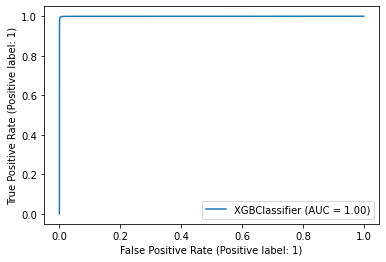

In [505]:
# Plotting ROC for train predictions
RocCurveDisplay.from_estimator(XGB_model, X_train, y_train)
plt.show()

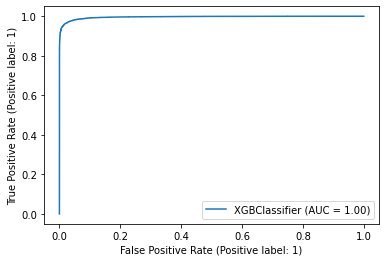

In [506]:
# Plotting ROC for train predictions
RocCurveDisplay.from_estimator(XGB_model, X_test, y_test)
plt.show()

The XGBoost model seems to be the best performing one so far and has 97% accuracy with 97% recall rate making it the best performing model for identifying customers who are likely to churn

## XGboost with PCA

In [496]:
XGB_pca_model = XGBClassifier()
XGB_pca_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [502]:
# make predictions for test data
y_train_pred = XGB_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

print()

print(f'Accuracy:- {round(metrics.accuracy_score(y_train, y_train_pred)*100,2)}%')

# Sensitivity
print(f'Sensitivity/Recall:- {round(metrics.recall_score(y_train, y_train_pred)*100,2)}%')
      
# Specificity
print(f'Precision :- {round(metrics.precision_score(y_train, y_train_pred)*100,2)}%')

# F1 score:
print(f'F1 score :- {round(metrics.f1_score(y_train, y_train_pred)*100,2)}%')

[[18180   623]
 [   79 18789]]

Accuracy:- 98.14%
Sensitivity/Recall:- 99.58%
Precision :- 96.79%
F1 score :- 98.17%


In [504]:
# make predictions for test data
y_test_pred = XGB_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print()

print(f'Accuracy:- {round(metrics.accuracy_score(y_test, y_test_pred)*100,2)}%')

# Sensitivity
print(f'Sensitivity/Recall:- {round(metrics.recall_score(y_test, y_test_pred)*100,2)}%')
      
# Specificity
print(f'Precision :- {round(metrics.precision_score(y_test, y_test_pred)*100,2)}%')

# F1 score:
print(f'F1 score :- {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%')


[[7420  685]
 [ 228 7812]]

Accuracy:- 94.34%
Sensitivity/Recall:- 97.16%
Precision :- 91.94%
F1 score :- 94.48%


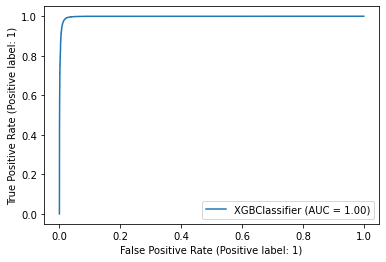

In [508]:
# Plotting ROC for train predictions
RocCurveDisplay.from_estimator(XGB_pca_model, X_train_pca, y_train)
plt.show()

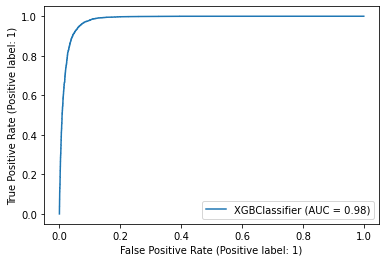

In [509]:
# Plotting ROC for train predictions
RocCurveDisplay.from_estimator(XGB_pca_model, X_test_pca, y_test)
plt.show()

The XGBoost model with PCA seems to perform as well as the one without PCA however it tends to loose some accuracy on the test set although the sensitivity is similar

# Conclusions

Given our bussines probelm, to retain their customers, we need higher recall. As giving an offer to an user not going to churn will cost less as compared to loosing a customer and bring new customer, we need to have high rate of correctly identifying the true positives, hence recall.

### Models and performances

| Model Name                   | Accuracy | Recall |
|------------------------------|----------|--------|
| Logistic Regression          | 80.08    | 79.58  |
| Logistic Regression with PCA | 81.63    | 81.77  |
| Decision Tree                | 92       | 94     |
| Decision Tree with PCA       | 82.3     | 84.2   |
| Random Forest                | 95       | 95     |
| XGBoost                      | 97.09    | 97     |
| XGBoost with PCA             | 94.34    | 97.16  |

When we compare our models it is easy for us to see that the XGBoost model and the Radom Forest model perform the best. Since the XGBoost model is simple to use it will be our preferred model as the XGBoost with PCA requires PCA done for little gain in Recall and a lot of loss in accuracy we shall use the regular XGBoost model.


### The top 10 churn predictors are :

| Feature names      | Co-efficients |
|--------------------|--------------:|
| last_day_rch_amt_8 |     -0.793903 |
| monthly_3g_8       |     -0.706257 |
| total_rech_num_8   |     -0.705996 |
| GP_avg_arpu        |      0.684334 |
| spl_ic_mou_8       |     -0.618816 |
| monthly_2g_8       |     -0.491229 |
| GP_avg_loc_og_mou  |     -0.478089 |
| aon                |     -0.461352 |
| sachet_2g_8        |     -0.441903 |
| std_ic_mou_8       |     -0.384481 |

Most of the top predictors are from the action phase, as the drop in engagement is prominent in that phase as also observed from the EDA.

### Stratergies to manage customer churn

- Customer behaviour during action phase should be monitored as that phase has a lot of indicators with regards to churn.
- The last recharge amount is the strongest indicator of customer churn in the action phase.
- 3G usage aand total number of recharges in the action phase are good indicators of churn too.
- Average revenue per customer in the good phase as well as local outgoing minutes in the good phase as well could be strong indicators of churn and should be monitored regularly
- Customer within the the time span of 10 to 40 months also are highly likely to churn as from EDA and special attention should be paid to them and how they behave across the remaining features.
- STD incoming minutes during the action phase also are indicators of customer churn.
- Customers who make recharges that have validity of less that a month especially in the action phase are also likely to churn and should be targetted with promotional offers so that they choose to stay with the network